# Import

In [371]:
# from google.colab import drive
# drive.mount('/content/drive')

In [372]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [373]:
# Visual Python: Data Analysis > File
calculated_cocacola_report = pd.read_csv('./drive/MyDrive/Colab Notebooks/ESG/Calculated_cocacola_report.csv')
calculated_cocacola_comments = pd.read_csv('./drive/MyDrive/Colab Notebooks/ESG/Calculated_cocacola_comments.csv')
calculated_carrefour_report = pd.read_csv('./drive/MyDrive/Colab Notebooks/ESG/Calculated_carrefour_report.csv')
calculated_carrefour_comments = pd.read_csv('./drive/MyDrive/Colab Notebooks/ESG/Calculated_carrefour_comments.csv')

In [374]:
calculated_cocacola_report.drop(columns=['Unnamed: 0', 'Preprocessed'], inplace=True)
calculated_cocacola_comments.drop(columns=['Unnamed: 0', 'Stemmed'], inplace=True)
calculated_carrefour_report.drop(columns=['Unnamed: 0', 'Preprocessed'], inplace=True)
calculated_carrefour_comments.drop(columns=['Unnamed: 0', 'Stemmed'], inplace=True)

In [375]:
#plt.rc('figure', figsize=(10, 6))

from matplotlib import style
style.use('ggplot')

from matplotlib import rcParams
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

# Cocacola

## Report

### Log scaling

In [376]:
max_cocacola = calculated_cocacola_report.max().max()
min_cocacola = calculated_cocacola_report.min().min()

In [377]:
print("max_cocacola: ", max_cocacola)
print("min_cocacola: ", min_cocacola)

max_cocacola:  5472.927602088435
min_cocacola:  -6.917871326208187


In [378]:
calculated_cocacola_report.mean()

,0
SDG01,50.938655
SDG02,55.167755
SDG03,185.726399
SDG04,115.734989
SDG05,70.357328
SDG06,60.918953
SDG07,56.565592
SDG08,178.191395
SDG09,147.105867
SDG10,81.288100


In [379]:
# Visual Python: Data Analysis > Data Info
calculated_cocacola_report.describe()

,SDG01,SDG02,SDG03,SDG04,SDG05,SDG06,SDG07,SDG08,SDG09,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
count,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000
mean,50.938655,55.167755,185.726399,115.734989,70.357328,60.918953,56.565592,178.191395,147.105867,81.288100,63.907469,68.013233,29.698524,38.119977,21.924162,51.972770,117.885227
std,53.197657,59.101495,207.003765,120.920754,80.826481,69.018230,63.606335,188.606543,159.013052,83.680232,64.814166,73.836919,28.537066,42.817698,24.138492,52.828443,128.822832
min,0.000000,-0.389073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.552887,0.000000,-6.917871,0.000000,-0.917510,0.000000,0.000000
25%,25.983279,28.432903,93.389638,60.593686,32.996942,27.543202,24.132185,94.134395,75.102586,42.772326,32.374161,33.100039,15.673476,19.092458,11.134175,27.845779,59.136949
50%,42.477796,45.009451,154.900755,97.521259,57.897012,47.161994,44.027891,148.216863,123.150952,67.811820,52.711568,55.230367,25.683099,31.260080,17.887450,44.096142,97.982014
75%,63.119901,68.995522,231.814650,143.874665,88.643778,76.538028,73.387079,220.721638,180.345624,101.839781,80.901139,86.046804,37.909909,46.393464,26.698802,64.438692,145.936676
max,1376.627336,1505.492524,5472.927602,3111.454453,2144.725775,1518.505844,1385.062726,4895.169195,4033.942223,2141.110798,1574.779267,1850.347086,724.429948,1073.326677,549.656404,1356.862401,3299.708093


<Figure size 1500x1200 with 0 Axes>

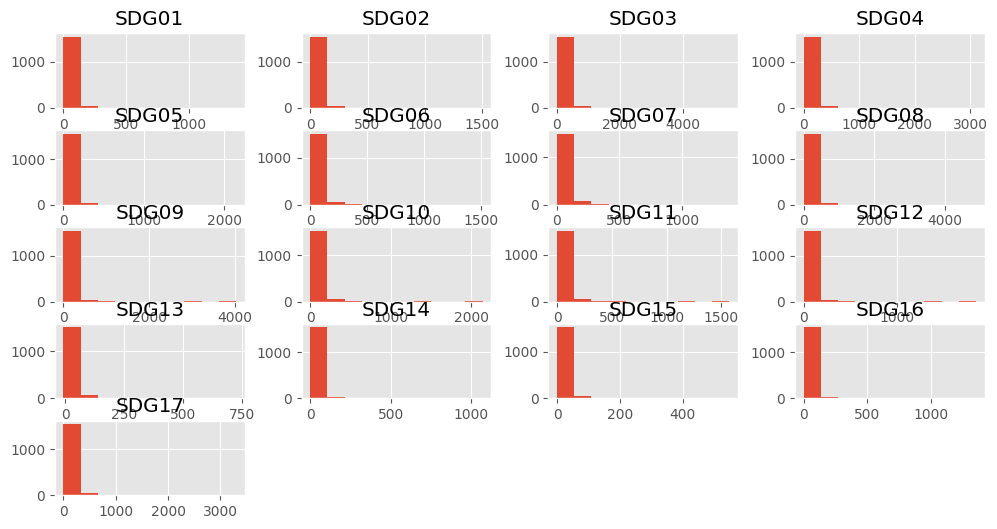

In [380]:
# Visual Python: Data Analysis > Data Info
plt.figure(figsize=(15, 12))  # 너비 12, 높이 8로 설정 (크기를 원하는대로 조절 가능)
calculated_cocacola_report.hist()
plt.show()

<Axes: >

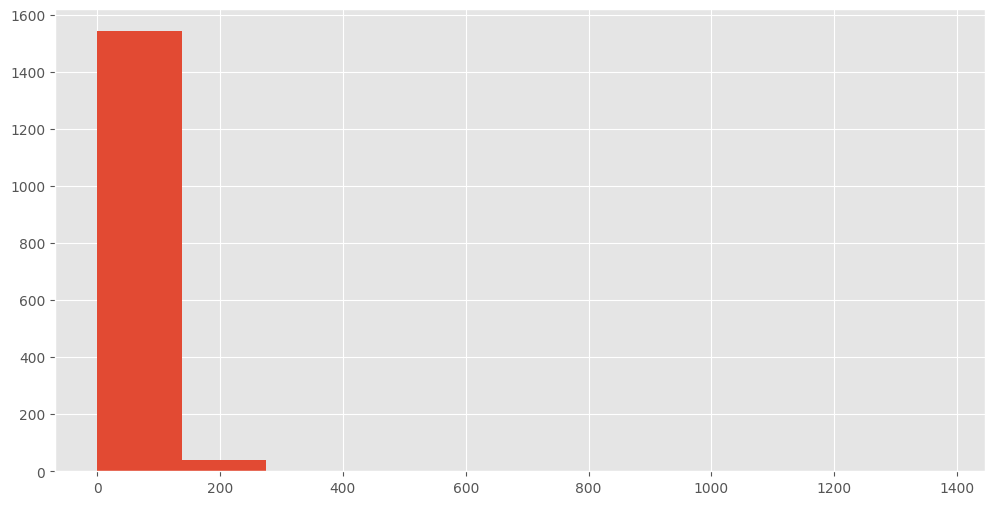

In [381]:
calculated_cocacola_report['SDG01'].hist()

In [382]:
import numpy as np

scaled_cocacola_report = np.log1p(calculated_cocacola_report)  # log(1 + value)를 적용하여 0 값 문제 해결

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [383]:
scaled_cocacola_report.describe()

,SDG01,SDG02,SDG03,SDG04,SDG05,SDG06,SDG07,SDG08,SDG09,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
count,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1584.000000,1585.000000,1581.000000,1585.000000,1585.000000,1585.000000,1585.000000
mean,3.665782,3.733183,4.898368,4.456683,3.927583,3.774555,3.665972,4.884450,4.683782,4.120307,3.870141,3.922721,3.160190,3.368192,2.839894,3.698219,4.452870
std,0.841111,0.859962,0.986459,0.923421,0.948945,0.930234,0.994490,0.933644,0.936849,0.874138,0.888452,0.889071,0.832568,0.850708,0.838682,0.833583,0.949763
min,0.000000,-0.492778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.772620,0.000000,-2.495084,0.000000,0.000000
25%,3.295217,3.382113,4.547431,4.120559,3.526271,3.351419,3.224149,4.555291,4.332082,3.779002,3.507970,3.529299,2.822183,3.000345,2.496026,3.361964,4.096624
50%,3.772250,3.828847,5.049220,4.590272,4.075790,3.874570,3.807282,5.005401,4.821498,4.231376,3.983884,4.029457,3.288332,3.473831,2.938498,3.808797,4.594938
75%,4.160755,4.248431,5.450243,4.975869,4.495844,4.350769,4.309282,5.401423,5.200405,4.633172,4.406061,4.466446,3.661780,3.858484,3.321389,4.181114,4.990002
max,7.228118,7.317539,8.607752,8.043167,7.671233,7.326140,7.234222,8.496208,8.302747,7.669547,7.362505,7.523669,6.586765,6.979449,6.311111,7.213667,8.101892


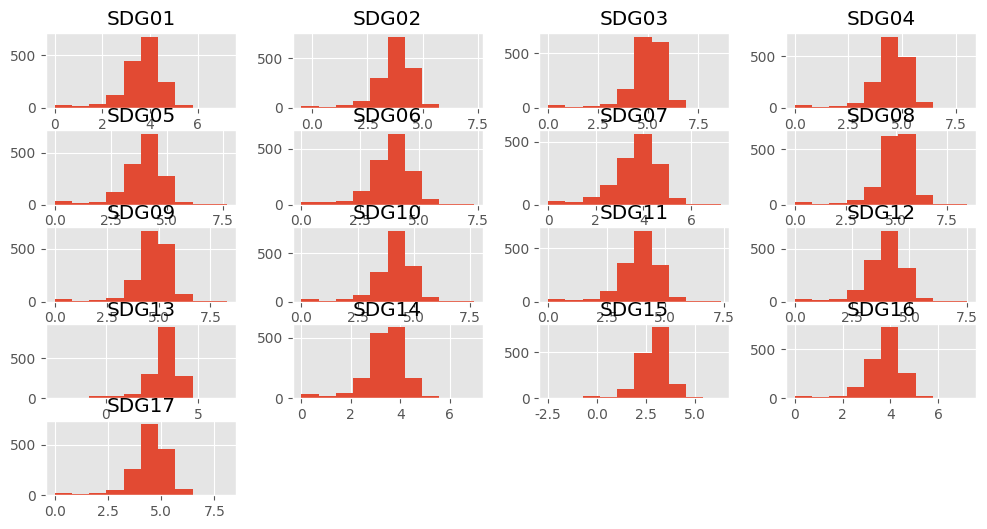

In [384]:
# Visual Python: Data Analysis > Data Info
scaled_cocacola_report.hist()
plt.show()

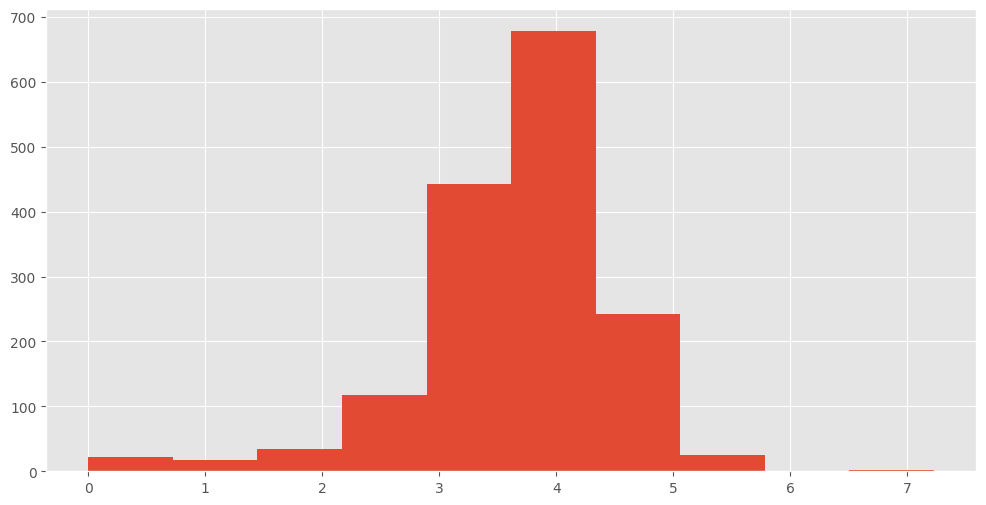

In [385]:
scaled_cocacola_report['SDG01'].hist()
plt.show()

### Visualization

In [386]:
mean_scaled_cocacola_report = scaled_cocacola_report.mean()

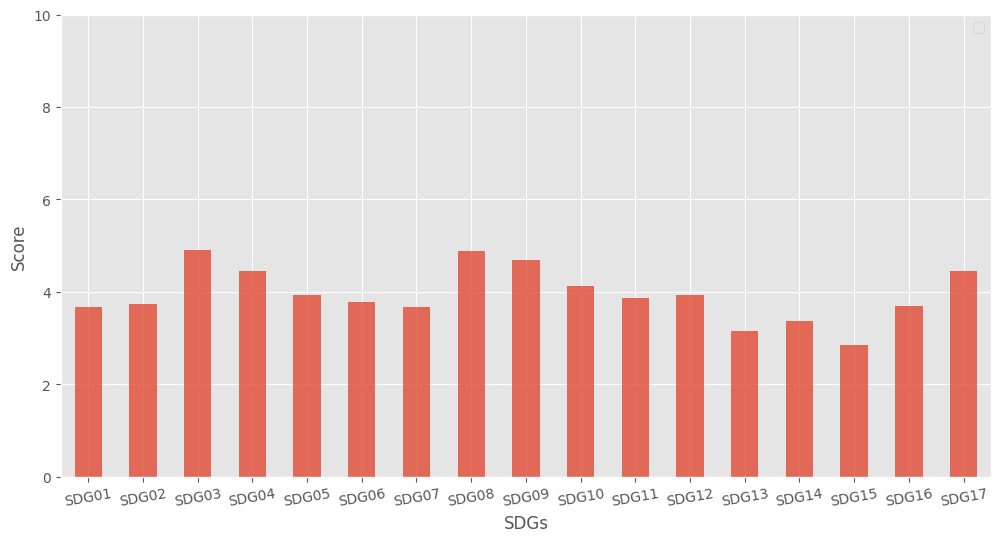

In [387]:
plt.rc('figure', figsize=(12, 6))
mean_scaled_cocacola_report.plot(kind='bar', rot=10, alpha=0.8)
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.ylim(0,10)
plt.legend(loc='best')
plt.show()

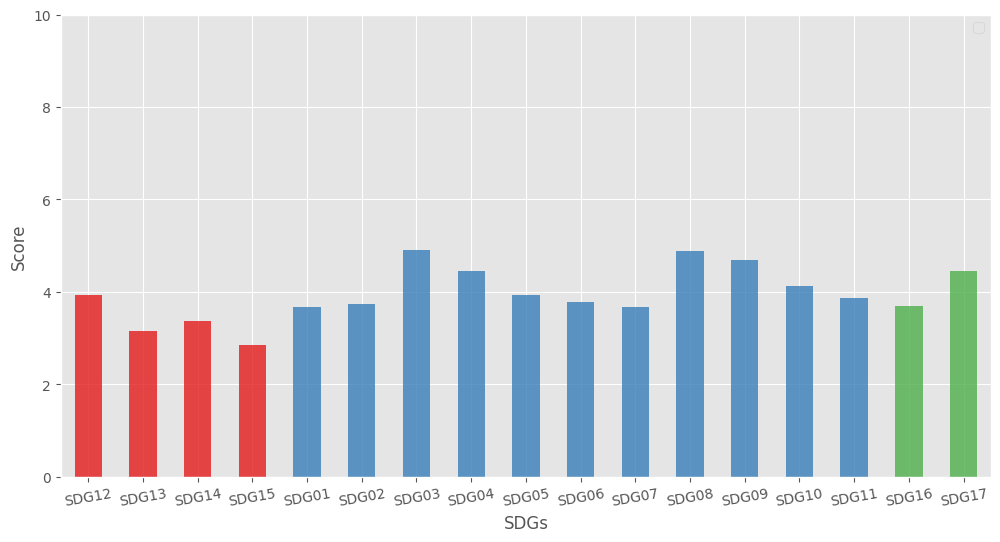

In [388]:
# SDG 번호들을 ESG에 맞게 그룹화
E_SDGs = ['SDG12', 'SDG13', 'SDG14', 'SDG15']
S_SDGs = ['SDG01', 'SDG02', 'SDG03', 'SDG04', 'SDG05', 'SDG06', 'SDG07', 'SDG08', 'SDG09', 'SDG10', 'SDG11']
G_SDGs = ['SDG16', 'SDG17']

# E, S, G 그룹에 맞게 순서 재배치
ESG_order = E_SDGs + S_SDGs + G_SDGs

# 순서 재배치된 데이터
mean_scaled_cocacola_report_reordered = mean_scaled_cocacola_report[ESG_order]

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 3)  # 파스텔 톤의 세련된 두 가지 색상

# Seaborn의 muted 컬러 팔레트를 활용한 색상 설정
e_color = colors[0]  # muted 초록 계열
s_color = colors[1]  # muted 파랑 계열
g_color = colors[2]  # muted 보라 계열

# 색상 지정: E(초록), S(파랑), G(빨강)
colors = [e_color] * len(E_SDGs) + [s_color] * len(S_SDGs) + [g_color] * len(G_SDGs)

# 그래프 그리기
plt.rc('figure', figsize=(12, 6))
mean_scaled_cocacola_report_reordered.plot(kind='bar', color=colors, rot=10, alpha=0.8)
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.ylim(0, 10)
plt.legend(loc='best')
plt.show()

In [389]:
print('E_SDGs mean: ', mean_scaled_cocacola_report[E_SDGs].mean())
print('S_SDGs mean: ', mean_scaled_cocacola_report[S_SDGs].mean())
print('G_SDGs mean: ', mean_scaled_cocacola_report[G_SDGs].mean())

E_SDGs mean:  3.3227495438026784
S_SDGs mean:  4.152800435691676
G_SDGs mean:  4.075544610530329


## Comment

### Log scaling

In [390]:
max_cocacola = calculated_cocacola_comments.max().max()
min_cocacola = calculated_cocacola_comments.min().min()

In [391]:
print("max_cocacola: ", max_cocacola)
print("min_cocacola: ", min_cocacola)

max_cocacola:  1143.1340129971502
min_cocacola:  -2.737702161073683


In [392]:
calculated_cocacola_comments.mean()

,0
SDG01,13.674353
SDG02,16.588738
SDG03,60.664386
SDG04,35.312251
SDG05,19.266516
SDG06,17.789538
SDG07,12.200185
SDG08,57.476241
SDG09,45.308622
SDG10,24.833562


In [393]:
# Visual Python: Data Analysis > Data Info
calculated_cocacola_comments.describe()

,SDG01,SDG02,SDG03,SDG04,SDG05,SDG06,SDG07,SDG08,SDG09,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
count,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000
mean,13.674353,16.588738,60.664386,35.312251,19.266516,17.789538,12.200185,57.476241,45.308622,24.833562,16.294205,19.023683,10.888861,12.028460,6.824668,18.751030,30.858238
std,19.963965,24.253312,92.704833,51.947513,30.011502,26.806016,18.973979,81.554935,67.342384,35.308779,25.172840,27.836666,14.910404,18.434126,10.430054,26.118848,47.675978
min,-1.346794,-1.823648,-2.649458,0.000000,-2.031502,-0.661167,-0.419590,-0.726487,0.000000,-0.499872,-1.495859,-2.534586,-2.737702,-0.979862,-1.776419,-2.404475,0.000000
25%,0.391803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.623106,0.556131,0.679230,0.000000,0.305133,0.000000,0.000000,0.000000,0.432495,0.000000
50%,5.454378,7.057023,21.673271,14.237750,6.329306,7.156058,4.181149,25.262068,17.684778,10.967216,5.767275,7.919511,5.551339,4.358191,2.447511,8.944904,10.231275
75%,18.357429,22.511358,80.577831,47.838473,26.009328,23.884968,16.257559,77.009527,61.145587,33.581082,21.737228,25.448193,15.288848,16.426985,9.271968,25.430179,40.459345
max,223.705973,278.563354,1143.134013,605.757293,356.830070,315.091601,208.785241,1031.196679,786.516476,426.594764,317.386200,321.565827,184.647654,218.417653,125.594674,333.412620,518.059222


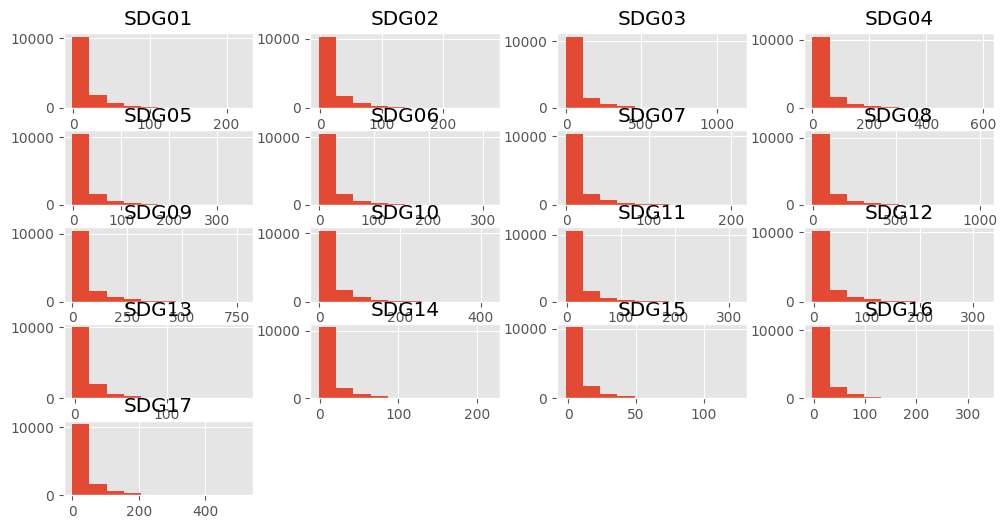

In [394]:
# Visual Python: Data Analysis > Data Info
calculated_cocacola_comments.hist()
plt.show()

<Axes: >

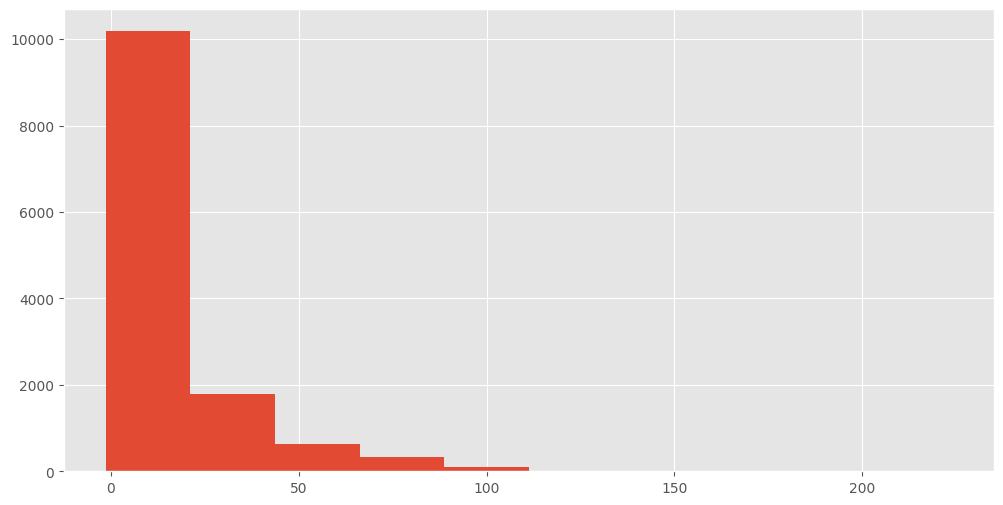

In [395]:
calculated_cocacola_comments['SDG01'].hist()

In [396]:
import numpy as np

scaled_cocacola_comments = np.log1p(calculated_cocacola_comments)  # log(1 + value)를 적용하여 0 값 문제 해결

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [397]:
scaled_cocacola_comments.describe()

,SDG01,SDG02,SDG03,SDG04,SDG05,SDG06,SDG07,SDG08,SDG09,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
count,13053.000000,13023.000000,13051.000000,13055.000000,13034.000000,13055.000000,13055.000000,13055.000000,13055.000000,13055.000000,13049.000000,13054.000000,13022.000000,13055.000000,12990.000000,13028.000000,13055.000000
mean,1.813693,1.918368,2.697417,2.394196,1.939471,1.937561,1.652806,2.841572,2.561840,2.243316,1.813230,2.015509,1.673442,1.639889,1.293673,2.068896,2.228621
std,1.402645,1.507239,2.012029,1.787422,1.574796,1.525377,1.417598,1.890818,1.866266,1.596159,1.553317,1.533040,1.368603,1.423659,1.265559,1.503900,1.761203
min,-0.786712,-4.420545,-0.779258,0.000000,-1.972716,-1.082247,-0.544021,-1.296406,0.000000,-0.692890,-3.858382,-2.697998,-2.537756,-3.905159,-4.529640,-3.215351,0.000000
25%,0.330600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.964359,0.442202,0.518335,0.000000,0.267168,0.000000,0.000000,0.000000,0.396542,0.000000
50%,1.865865,2.093611,3.122477,2.723776,1.995118,2.098761,1.645027,3.268126,2.927709,2.482171,1.913282,2.188308,1.884567,1.678626,1.254771,2.305256,2.418702
75%,2.963076,3.161060,4.402796,3.888518,3.298060,3.214264,2.848250,4.356831,4.129480,3.543307,3.124357,3.275384,2.793537,2.858020,2.333378,3.276395,3.724713
max,5.414793,5.633229,7.042403,6.408129,5.880058,5.756032,5.346084,6.939445,6.668884,6.058176,5.763265,5.776307,5.223851,5.390977,4.840990,5.812376,6.252018


### Visualization

In [398]:
mean_scaled_cocacola_comments = scaled_cocacola_comments.mean()

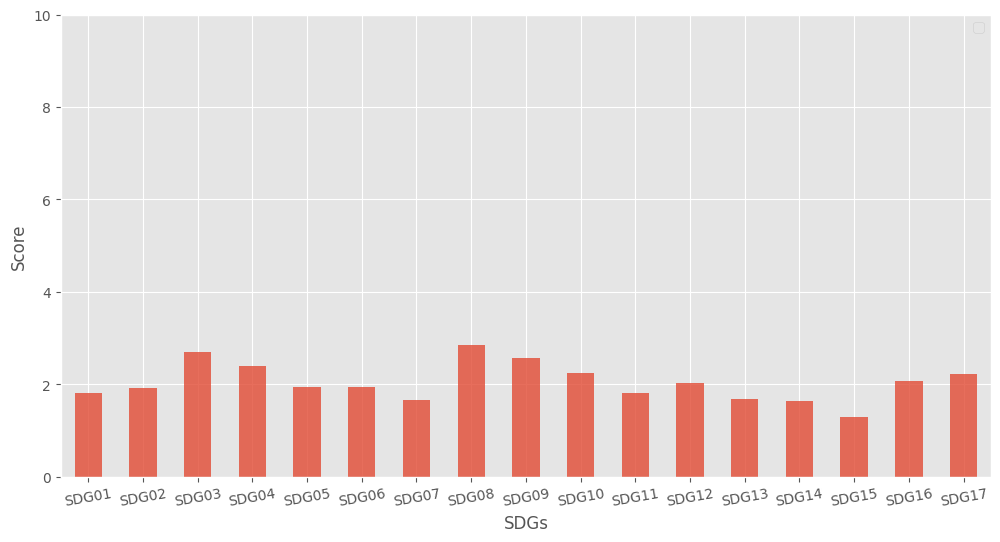

In [399]:
plt.rc('figure', figsize=(12, 6))
mean_scaled_cocacola_comments.plot(kind='bar', rot=10, alpha=0.8)
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.ylim(0,10)
plt.legend(loc='best')
plt.show()

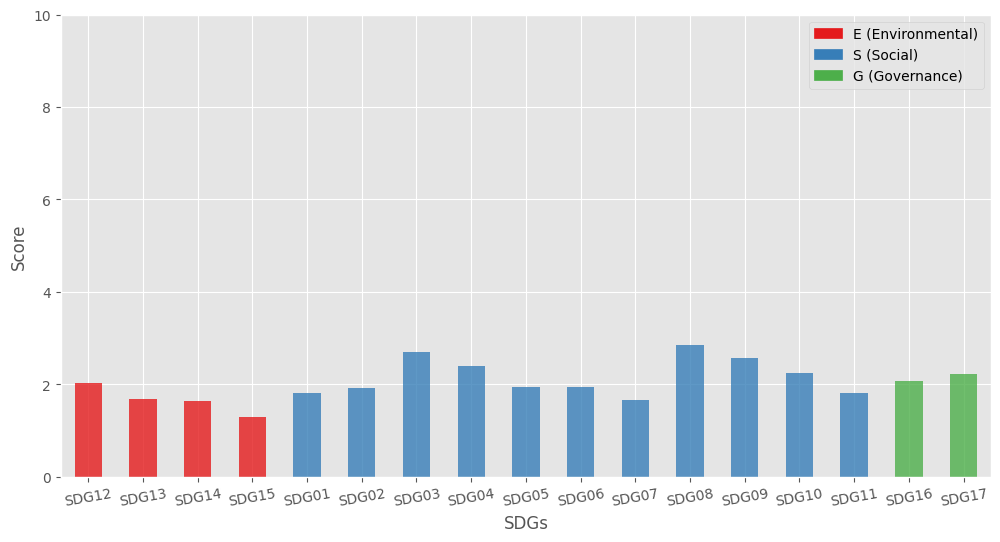

In [400]:
import seaborn as sns
import matplotlib.patches as mpatches

# SDG 번호들을 ESG에 맞게 그룹화
E_SDGs = ['SDG12', 'SDG13', 'SDG14', 'SDG15']
S_SDGs = ['SDG01', 'SDG02', 'SDG03', 'SDG04', 'SDG05', 'SDG06', 'SDG07', 'SDG08', 'SDG09', 'SDG10', 'SDG11']
G_SDGs = ['SDG16', 'SDG17']

# E, S, G 그룹에 맞게 순서 재배치
ESG_order = E_SDGs + S_SDGs + G_SDGs

# # Seaborn의 muted 컬러 팔레트를 활용한 색상 설정
# e_color = sns.color_palette("muted")[2]  # muted 초록 계열
# s_color = sns.color_palette("muted")[0]  # muted 파랑 계열
# g_color = sns.color_palette("muted")[4]  # muted 보라 계열

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 3)  # 파스텔 톤의 세련된 두 가지 색상

# Seaborn의 muted 컬러 팔레트를 활용한 색상 설정
e_color = colors[0]  # muted 초록 계열
s_color = colors[1]  # muted 파랑 계열
g_color = colors[2]  # muted 보라 계열

# 순서 재배치된 데이터
mean_scaled_cocacola_comments_reordered = mean_scaled_cocacola_comments[ESG_order]

# 색상 지정: E(초록), S(파랑), G(빨강)
colors = [e_color] * len(E_SDGs) + [s_color] * len(S_SDGs) + [g_color] * len(G_SDGs)

# 그래프 그리기
plt.rc('figure', figsize=(12, 6))
mean_scaled_cocacola_comments_reordered.plot(kind='bar', color=colors, rot=10, alpha=0.8)
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.ylim(0, 10)

# E, S, G에 대한 legend 생성
e_patch = mpatches.Patch(color=e_color, label='E (Environmental)')
s_patch = mpatches.Patch(color=s_color, label='S (Social)')
g_patch = mpatches.Patch(color=g_color, label='G (Governance)')

# 범례 추가
plt.legend(handles=[e_patch, s_patch, g_patch], loc='best')

plt.show()

In [401]:
print('E_SDGs mean: ', mean_scaled_cocacola_comments[E_SDGs].mean())
print('S_SDGs mean: ', mean_scaled_cocacola_comments[S_SDGs].mean())
print('G_SDGs mean: ', mean_scaled_cocacola_comments[G_SDGs].mean())

E_SDGs mean:  1.6556282583735067
S_SDGs mean:  2.1648609813494697
G_SDGs mean:  2.1487586945909625


## Comparison

### Original

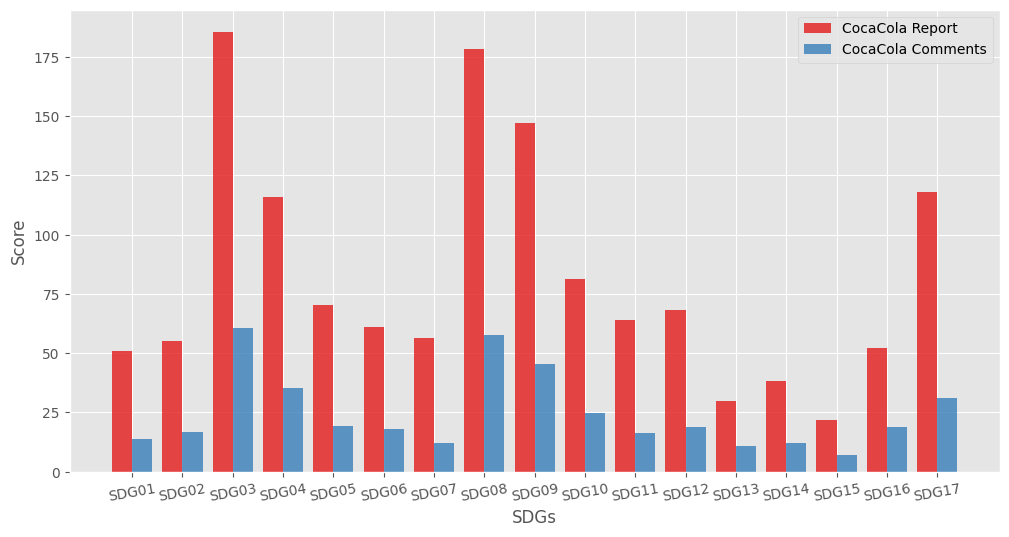

In [402]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 2)  # 파스텔 톤의 세련된 두 가지 색상

# 그래프 크기 설정
plt.rc('figure', figsize=(12, 6))

# bar의 폭을 조절하여 나란히 배치하기 위해 offset 설정
bar_width = 0.4
index = range(len(calculated_cocacola_report.columns))  # x축의 위치

# 첫 번째 데이터 (calculated_cocacola_report) 그래프
plt.bar([i - bar_width/2 for i in index], calculated_cocacola_report.mean(),
        width=bar_width, label='CocaCola Report', alpha=0.8, color=colors[0])

# 두 번째 데이터 (calculated_cocacola_comments) 그래프
plt.bar([i + bar_width/2 for i in index], calculated_cocacola_comments.mean(),
        width=bar_width, label='CocaCola Comments', alpha=0.8, color=colors[1])

# x축에 열 이름(SDG들) 설정
plt.xticks(index, calculated_cocacola_report.columns, rotation=10)

# 그래프 제목과 라벨 설정
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.legend(loc='best')

# 그래프 출력
plt.show()

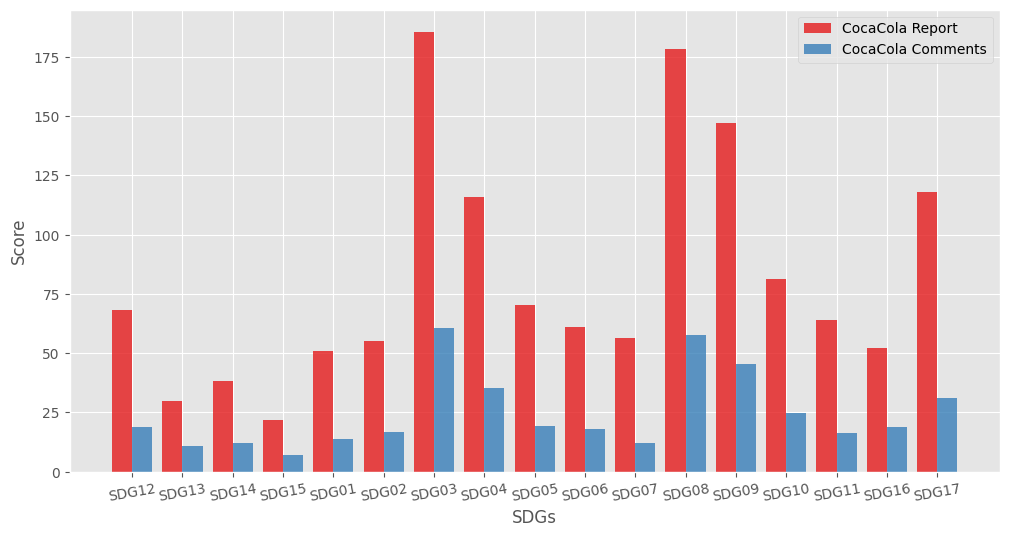

In [403]:
import matplotlib.pyplot as plt
import seaborn as sns

# SDG 번호들을 ESG에 맞게 그룹화
E_SDGs = ['SDG12', 'SDG13', 'SDG14', 'SDG15']
S_SDGs = ['SDG01', 'SDG02', 'SDG03', 'SDG04', 'SDG05', 'SDG06', 'SDG07', 'SDG08', 'SDG09', 'SDG10', 'SDG11']
G_SDGs = ['SDG16', 'SDG17']

# E, S, G 그룹에 맞게 순서 재배치
ESG_order = E_SDGs + S_SDGs + G_SDGs

# 순서 재배치된 데이터
calculated_cocacola_report_reordered = calculated_cocacola_report[ESG_order]
calculated_cocacola_comments_reordered = calculated_cocacola_comments[ESG_order]

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 2)  # 파스텔 톤의 세련된 두 가지 색상

# 그래프 크기 설정
plt.rc('figure', figsize=(12, 6))

# bar의 폭을 조절하여 나란히 배치하기 위해 offset 설정
bar_width = 0.4
index = range(len(ESG_order))  # x축의 위치

# 첫 번째 데이터 (calculated_cocacola_report) 그래프
plt.bar([i - bar_width/2 for i in index], calculated_cocacola_report_reordered.mean(),
        width=bar_width, label='CocaCola Report', alpha=0.8, color=colors[0])

# 두 번째 데이터 (calculated_cocacola_comments) 그래프
plt.bar([i + bar_width/2 for i in index], calculated_cocacola_comments_reordered.mean(),
        width=bar_width, label='CocaCola Comments', alpha=0.8, color=colors[1])

# x축에 열 이름(SDG들) 설정
plt.xticks(index, ESG_order, rotation=10)

# 그래프 제목과 라벨 설정
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.legend(loc='best')

# 그래프 출력
plt.show()

### Scaled

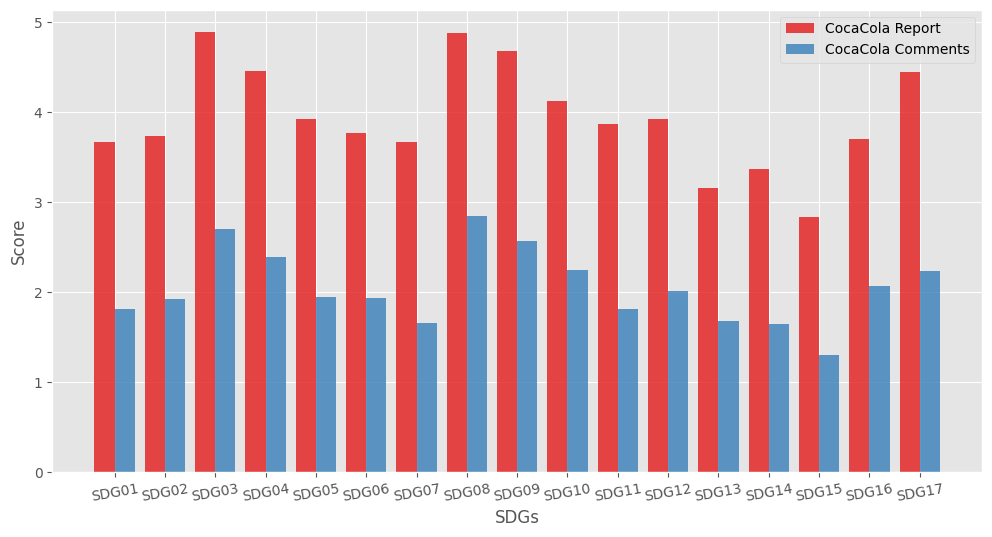

In [404]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 2)  # 파스텔 톤의 세련된 두 가지 색상

# 그래프 크기 설정
plt.rc('figure', figsize=(12, 6))

# bar의 폭을 조절하여 나란히 배치하기 위해 offset 설정
bar_width = 0.4
index = range(len(scaled_cocacola_report.columns))  # x축의 위치

# 첫 번째 데이터 (calculated_cocacola_report) 그래프
plt.bar([i - bar_width/2 for i in index], scaled_cocacola_report.mean(),
        width=bar_width, label='CocaCola Report', alpha=0.8, color=colors[0])

# 두 번째 데이터 (calculated_cocacola_comments) 그래프
plt.bar([i + bar_width/2 for i in index], scaled_cocacola_comments.mean(),
        width=bar_width, label='CocaCola Comments', alpha=0.8, color=colors[1])

# x축에 열 이름(SDG들) 설정
plt.xticks(index, scaled_cocacola_report.columns, rotation=10)

# 그래프 제목과 라벨 설정
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.legend(loc='best')

# 그래프 출력
plt.show()

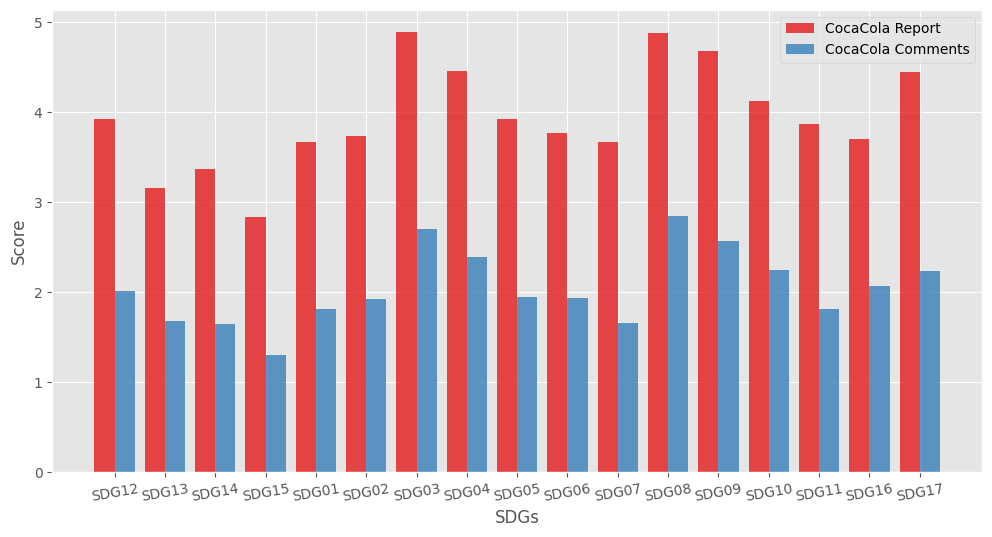

In [405]:
import matplotlib.pyplot as plt
import seaborn as sns

# SDG 번호들을 ESG에 맞게 그룹화
E_SDGs = ['SDG12', 'SDG13', 'SDG14', 'SDG15']
S_SDGs = ['SDG01', 'SDG02', 'SDG03', 'SDG04', 'SDG05', 'SDG06', 'SDG07', 'SDG08', 'SDG09', 'SDG10', 'SDG11']
G_SDGs = ['SDG16', 'SDG17']

# E, S, G 그룹에 맞게 순서 재배치
ESG_order = E_SDGs + S_SDGs + G_SDGs

# 순서 재배치된 데이터
scaled_cocacola_report_reordered = scaled_cocacola_report[ESG_order]
scaled_cocacola_comments_reordered = scaled_cocacola_comments[ESG_order]

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 2)  # 파스텔 톤의 세련된 두 가지 색상

# 그래프 크기 설정
plt.rc('figure', figsize=(12, 6))

# bar의 폭을 조절하여 나란히 배치하기 위해 offset 설정
bar_width = 0.4
index = range(len(ESG_order))  # x축의 위치

# 첫 번째 데이터 (calculated_cocacola_report) 그래프
plt.bar([i - bar_width/2 for i in index], scaled_cocacola_report_reordered.mean(),
        width=bar_width, label='CocaCola Report', alpha=0.8, color=colors[0])

# 두 번째 데이터 (calculated_cocacola_comments) 그래프
plt.bar([i + bar_width/2 for i in index], scaled_cocacola_comments_reordered.mean(),
        width=bar_width, label='CocaCola Comments', alpha=0.8, color=colors[1])

# x축에 열 이름(SDG들) 설정
plt.xticks(index, ESG_order, rotation=10)

# 그래프 제목과 라벨 설정
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.legend(loc='best')

# 그래프 출력
plt.show()

### Scaled for Comparison

In [406]:
# Min-Max 스케일링을 사용하여 0-100 사이로 값들을 스케일링
scaled_cocacola_report_2 = (scaled_cocacola_report - scaled_cocacola_report.min()) / (scaled_cocacola_report.max() - scaled_cocacola_report.min()) * 10
scaled_cocacola_comments_2 = (scaled_cocacola_comments - scaled_cocacola_comments.min()) / (scaled_cocacola_comments.max() - scaled_cocacola_comments.min()) * 10

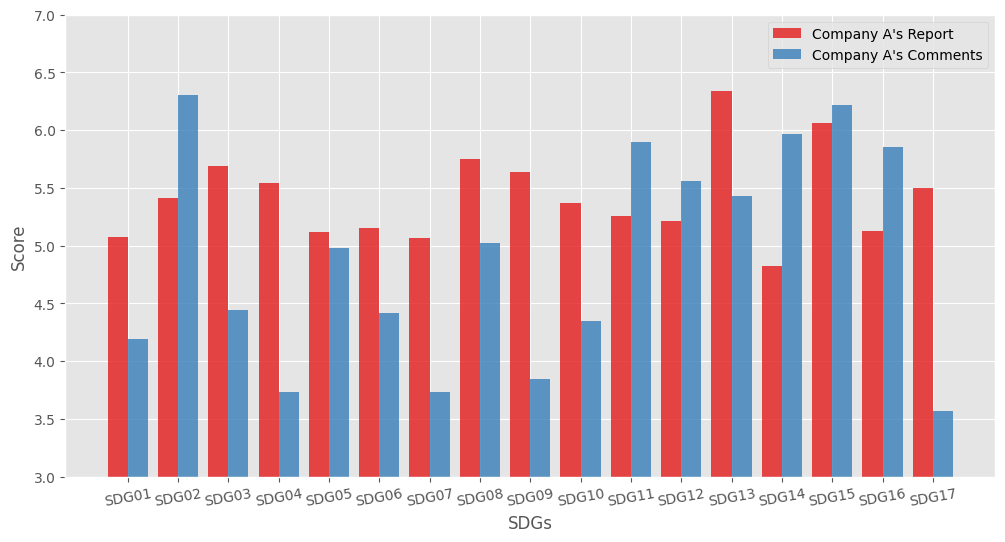

In [407]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 2)  # 파스텔 톤의 세련된 두 가지 색상

# 그래프 크기 설정
plt.rc('figure', figsize=(12, 6))

# bar의 폭을 조절하여 나란히 배치하기 위해 offset 설정
bar_width = 0.4
index = range(len(scaled_cocacola_report_2.columns))  # x축의 위치

# 첫 번째 데이터 (calculated_cocacola_report) 그래프
plt.bar([i - bar_width/2 for i in index], scaled_cocacola_report_2.mean(),
        width=bar_width, label="Company A's Report", alpha=0.8, color=colors[0])

# 두 번째 데이터 (calculated_cocacola_comments) 그래프
plt.bar([i + bar_width/2 for i in index], scaled_cocacola_comments_2.mean(),
        width=bar_width, label="Company A's Comments", alpha=0.8, color=colors[1])

# x축에 열 이름(SDG들) 설정
plt.xticks(index, scaled_cocacola_report_2.columns, rotation=10)

# 그래프 제목과 라벨 설정
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.ylim(3, 7)
plt.legend(loc='best')

# 그래프 출력
plt.show()

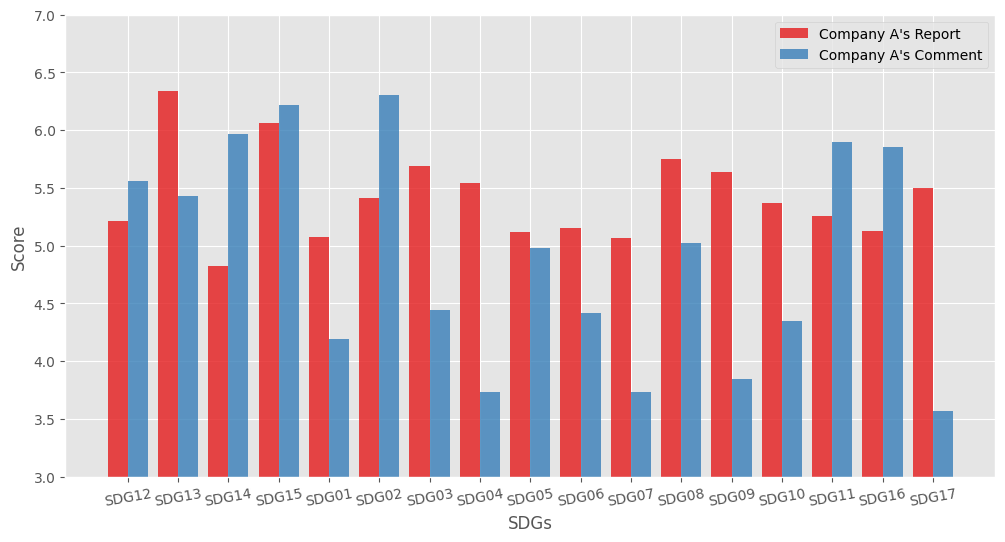

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns

# SDG 번호들을 ESG에 맞게 그룹화
E_SDGs = ['SDG12', 'SDG13', 'SDG14', 'SDG15']
S_SDGs = ['SDG01', 'SDG02', 'SDG03', 'SDG04', 'SDG05', 'SDG06', 'SDG07', 'SDG08', 'SDG09', 'SDG10', 'SDG11']
G_SDGs = ['SDG16', 'SDG17']

# E, S, G 그룹에 맞게 순서 재배치
ESG_order = E_SDGs + S_SDGs + G_SDGs

# 순서 재배치된 데이터
scaled_cocacola_report_reordered_2 = scaled_cocacola_report_2[ESG_order]
scaled_cocacola_comments_reordered_2 = scaled_cocacola_comments_2[ESG_order]

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 2)  # 파스텔 톤의 세련된 두 가지 색상

# 그래프 크기 설정
plt.rc('figure', figsize=(12, 6))

# bar의 폭을 조절하여 나란히 배치하기 위해 offset 설정
bar_width = 0.4
index = range(len(ESG_order))  # x축의 위치

# 첫 번째 데이터 (calculated_cocacola_report) 그래프
plt.bar([i - bar_width/2 for i in index], scaled_cocacola_report_reordered_2.mean(),
        width=bar_width, label="Company A's Report", alpha=0.8, color=colors[0])

# 두 번째 데이터 (calculated_cocacola_comments) 그래프
plt.bar([i + bar_width/2 for i in index], scaled_cocacola_comments_reordered_2.mean(),
        width=bar_width, label="Company A's Comment", alpha=0.8, color=colors[1])

# x축에 열 이름(SDG들) 설정
plt.xticks(index, ESG_order, rotation=10)

# 그래프 제목과 라벨 설정
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.ylim(3, 7)
plt.legend(loc='best')

# 그래프 출력
plt.show()

#### Distribution Comparison

In [409]:
# Visual Python: ANOVA
def vp_confidence_interval(var, confidence_level=0.95):
    try: sr = pd.Series(var)
    except: return np.nan
    return stats.t.interval(confidence_level, df=sr.count()-1, loc=sr.mean(), scale=sr.std() / np.sqrt(sr.count()) )
def vp_sem(var):
    try: sr = pd.Series(var)
    except: return np.nan
    return sr.std() / np.sqrt(sr.count())

In [410]:
scaled_cocacola_report_2

,SDG01,SDG02,SDG03,SDG04,SDG05,SDG06,SDG07,SDG08,SDG09,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
0,2.477813,2.150371,1.762397,1.665817,1.212295,2.240730,1.060483,2.692984,1.604943,1.988010,2.038717,1.649641,3.779858,0.000000,1.787348,1.736384,1.530457
1,2.014150,3.259607,2.434801,2.657701,1.148039,2.736828,2.583761,3.137352,2.090176,2.485484,2.363946,2.294078,4.534231,0.000000,1.864743,2.748067,2.266394
2,2.113800,2.831984,2.153431,2.475482,1.995556,1.359904,2.851748,3.396897,2.809231,2.361986,1.856158,3.035676,4.257766,1.373148,3.795931,1.876902,1.839522
3,5.913099,6.248148,6.370116,6.312014,6.066412,6.204894,6.191570,6.457072,6.451287,6.149850,5.828179,6.252299,6.973082,5.568787,6.915952,6.070085,6.228334
4,5.385341,5.925066,5.766590,5.857272,5.514477,5.644749,6.178140,6.141403,5.843460,5.770628,6.194086,6.001031,6.524838,5.275934,6.340552,5.120109,5.668182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,4.146708,4.324851,5.079102,4.746667,4.410280,3.704202,3.753784,5.009517,4.925612,4.497975,4.340064,4.260632,6.144502,3.669695,5.599519,4.004896,4.884266
1581,4.706768,5.400627,5.632043,5.390994,5.045064,5.166812,4.543641,5.475414,5.391185,5.109047,5.078509,4.935173,6.212522,4.663501,5.743139,5.022852,5.244522
1582,3.694573,3.998480,4.407343,4.438749,3.554076,3.680481,2.955680,4.402358,4.553476,4.054202,3.811944,3.973283,5.683543,3.179920,4.708864,4.276513,4.344378
1583,4.179209,5.221751,4.774331,4.422676,3.888553,6.059968,6.083523,4.706420,5.112785,3.876862,4.332457,5.283503,3.214200,4.634770,5.722040,3.780812,4.155117


In [411]:
scaled_cocacola_comments_2

,SDG01,SDG02,SDG03,SDG04,SDG05,SDG06,SDG07,SDG08,SDG09,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
0,8.185160,8.745941,8.238408,8.072838,8.431007,7.996003,7.859316,8.180442,8.067461,8.172929,8.634994,8.433677,8.435536,8.471540,8.445418,8.442365,8.253972
1,7.334603,8.534509,7.800514,7.296239,7.748144,7.447362,7.647368,7.914645,7.603489,7.419422,8.155169,8.281359,7.633511,8.254561,8.002110,7.866496,7.314912
2,7.440107,8.360036,7.939241,7.552828,7.907983,7.749008,7.531334,8.108070,7.680019,7.862420,8.388396,8.217573,8.080650,8.359457,8.481523,8.264148,7.736676
3,3.803763,6.123228,5.064969,4.175693,4.686158,4.506837,2.613814,5.692936,4.330747,4.593095,5.884533,5.710174,5.997909,6.182174,6.571119,6.262075,3.876845
4,4.200253,7.004967,4.567096,4.151041,4.472890,5.236609,3.635135,5.002970,3.753524,3.909673,6.204520,5.689675,5.812850,5.660596,6.071962,5.921153,3.145082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13050,1.242469,5.566503,2.671195,2.320760,3.700173,2.960320,2.703602,3.604769,1.577407,2.146457,4.719195,4.471148,5.157658,4.647401,5.694436,4.871777,1.081856
13051,3.651296,5.886598,3.802146,3.687761,3.687706,4.392222,2.574932,4.850649,2.464418,3.976936,4.486349,4.951535,4.673213,4.929640,4.955107,5.396723,1.909554
13052,1.268582,4.396901,0.996282,0.000000,2.512126,1.582631,0.923619,1.574101,0.000000,1.026342,4.010105,3.183740,3.269627,4.200841,4.833869,3.561639,0.000000
13053,1.268582,4.396901,0.996282,0.000000,2.512126,1.582631,0.923619,1.574101,0.000000,1.026342,4.010105,3.183740,3.269627,4.200841,4.833869,3.561639,0.000000


In [412]:
cocacola_report_E = scaled_cocacola_report.loc[:, ['SDG12','SDG13','SDG14','SDG15']].copy()
cocacola_report_S = scaled_cocacola_report.loc[:, ['SDG01','SDG02','SDG03','SDG04','SDG05','SDG06','SDG07','SDG08','SDG09','SDG10','SDG11']].copy()
cocacola_report_G = scaled_cocacola_report.loc[:, ['SDG16','SDG17']].copy()

cocacola_comments_E = scaled_cocacola_comments.loc[:, ['SDG12','SDG13','SDG14','SDG15']].copy()
cocacola_comments_S = scaled_cocacola_comments.loc[:, ['SDG01','SDG02','SDG03','SDG04','SDG05','SDG06','SDG07','SDG08','SDG09','SDG10','SDG11']].copy()
cocacola_comments_G = scaled_cocacola_comments.loc[:, ['SDG16','SDG17']].copy()

In [413]:
# SDG01부터 SDG17까지 반복
for i in range(1, 18):  # 1부터 17까지
    sdg_name = f'SDG{i:02}'  # SDG01, SDG02 등의 형식으로 만듦
    df_name = f'coca_comments_{sdg_name}'  # 데이터프레임 이름 생성

    # 각 SDG별 데이터프레임 생성
    globals()[df_name] = pd.DataFrame()
    globals()[df_name]['score'] = scaled_cocacola_comments_2[sdg_name]
    globals()[df_name]['group'] = sdg_name
    globals()[df_name]['type'] = 'comments'

for i in range(1, 18):
  sdg_name = f'SDG{i:02}'
  df_name = f'coca_reports_{sdg_name}'

  globals()[df_name] = pd.DataFrame()
  globals()[df_name]['score'] = scaled_cocacola_report_2[sdg_name]
  globals()[df_name]['group'] = sdg_name
  globals()[df_name]['type'] = 'reports'

##### E

In [414]:
coca_E = pd.concat([coca_comments_SDG12,coca_comments_SDG13,coca_comments_SDG14,coca_comments_SDG15, coca_reports_SDG12,coca_reports_SDG13,coca_reports_SDG14,coca_reports_SDG15], join='outer', axis=0, ignore_index=True)



# Two-way ANOVA
vp_df = coca_E.dropna().copy()

from IPython.display import display, Markdown
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby(['type','group'])['score'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)
    _df.columns = [[x[0] for x in _df.columns],[x[1] for x in _df.columns]]

# Statistics
display(Markdown('### Statistics'))
display(pd.DataFrame(data={'Count':_df.count(),'Mean':_df.mean(numeric_only=True),'Std. Deviation':_df.std(numeric_only=True),'Min':_df.min(),'Max':_df.max(),
                   'Std. Error Mean':_df.apply(vp_sem),'Confidence interval':0.95,
                   'Lower':_df.apply(vp_confidence_interval).T[0],'Upper':_df.apply(vp_confidence_interval).T[1] }))

# Equal Variance test (Levene)
from scipy import stats
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.levene(*_lst, center='mean')
display(Markdown('### Equal Variance test (Levene)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue}, index=['Equal Variance test (Levene)']))

# Two-way ANOVA
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
_model  = smf.ols('score ~ C(group) + C(type) + C(group):C(type)', vp_df)
_result = _model.fit()
_dfr = anova_lm(_result)
_dfr.loc['Total','df'] = _dfr['df'].sum()
_dfr.loc['Total','sum_sq'] = _dfr['sum_sq'].sum()
display(Markdown('### Two-way ANOVA'))
display(_dfr)

# Post-hoc: Tukey HSD
from statsmodels.sandbox.stats.multicomp import MultiComparison
_res = MultiComparison(vp_df['score'], vp_df['group']).tukeyhsd(alpha=0.05)
display(Markdown('### Post-hoc: Tukey HSD'))
display(_res.summary())

print()
display(Markdown('### tukey detail'))
tukey = pairwise_tukeyhsd(endog=vp_df['score'], groups=vp_df['group'] + " " + vp_df['type'], alpha=0.05)
print(tukey)

### Statistics

Count      Mean  Std. Deviation  Min   Max  Std. Error Mean  \
comments SDG12  13054  5.562116        1.809046  0.0  10.0         0.015834   
         SDG13  13022  5.425679        1.763298  0.0  10.0         0.015452   
         SDG14  13055  5.964895        1.531452  0.0  10.0         0.013403   
         SDG15  12990  6.214431        1.350559  0.0  10.0         0.011850   
reports  SDG12   1585  5.213841        1.181699  0.0  10.0         0.029682   
         SDG13   1581  6.338890        0.889554  0.0  10.0         0.022372   
         SDG14   1585  4.825871        1.218876  0.0  10.0         0.030616   
         SDG15   1585  6.058210        0.952378  0.0  10.0         0.023922   

                Confidence interval     Lower     Upper  
comments SDG12                 0.95  5.531080  5.593152  
         SDG13                 0.95  5.395390  5.455967  
         SDG14                 0.95  5.938623  5.991168  
         SDG15                 0.95  6.191204  6.237658  
reports  SDG12                 0.95  5.155621  5.272061  
         SDG13                 0.95  6.295007  6.382772  
         SDG14                 0.95  4.765819  4.885923  
         SDG15                 0.95  6.011289  6.105132

### Equal Variance test (Levene)

,Statistic,p-value
Equal Variance test (Levene),939.595978,0.0


### Two-way ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
C(group),3.0,4500.542100,1500.180700,605.706022,0.000000e+00
C(type),1.0,189.751529,189.751529,76.613200,2.133660e-18
C(group):C(type),3.0,3025.608597,1008.536199,407.201912,8.072961e-262
Residual,58449.0,144763.397741,2.476747,NaN,NaN
Total,58456.0,152479.299967,NaN,NaN,NaN


### Post-hoc: Tukey HSD

group1,group2,meandiff,p-adj,lower,upper,reject
SDG12,SDG13,0.0001,1.0,-0.0477,0.0479,False
SDG12,SDG14,0.3172,0.0,0.2694,0.3649,True
SDG12,SDG15,0.673,0.0,0.6252,0.7209,True
SDG13,SDG14,0.317,0.0,0.2692,0.3648,True
SDG13,SDG15,0.6729,0.0,0.625,0.7208,True
SDG14,SDG15,0.3559,0.0,0.308,0.4037,True


### tukey detail

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
SDG12 comments  SDG12 reports  -0.3483    0.0 -0.4752 -0.2214   True
SDG12 comments SDG13 comments  -0.1364    0.0 -0.1955 -0.0774   True
SDG12 comments  SDG13 reports   0.7768    0.0  0.6498  0.9038   True
SDG12 comments SDG14 comments   0.4028    0.0  0.3437  0.4618   True
SDG12 comments  SDG14 reports  -0.7362    0.0 -0.8631 -0.6094   True
SDG12 comments SDG15 comments   0.6523    0.0  0.5932  0.7114   True
SDG12 comments  SDG15 reports   0.4961    0.0  0.3692   0.623   True
 SDG12 reports SDG13 comments   0.2118    0.0  0.0849  0.3387   True
 SDG12 reports  SDG13 reports    1.125    0.0  0.9555  1.2946   True
 SDG12 reports SDG14 comments   0.7511    0.0  0.6242  0.8779   True
 SDG12 reports  SDG14 reports   -0.388    0.0 -0.5574 -0.2185   True
 SDG12 reports SDG15 comments   1.

##### S

In [415]:
coca_S = pd.concat([coca_comments_SDG01,coca_comments_SDG02,coca_comments_SDG03,coca_comments_SDG04, coca_comments_SDG05,coca_comments_SDG06,
                   coca_comments_SDG07,coca_comments_SDG08, coca_comments_SDG09,coca_comments_SDG10,coca_comments_SDG11,
                   coca_reports_SDG01,coca_reports_SDG02,coca_reports_SDG03,coca_reports_SDG04,
                   coca_reports_SDG05,coca_reports_SDG06,coca_reports_SDG07,coca_reports_SDG08,
                   coca_reports_SDG09,coca_reports_SDG10,coca_reports_SDG11], join='outer', axis=0, ignore_index=True)


# Two-way ANOVA
vp_df = coca_S.dropna().copy()

from IPython.display import display, Markdown
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby(['type','group'])['score'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)
    _df.columns = [[x[0] for x in _df.columns],[x[1] for x in _df.columns]]

# Statistics
display(Markdown('### Statistics'))
display(pd.DataFrame(data={'Count':_df.count(),'Mean':_df.mean(numeric_only=True),'Std. Deviation':_df.std(numeric_only=True),'Min':_df.min(),'Max':_df.max(),
                   'Std. Error Mean':_df.apply(vp_sem),'Confidence interval':0.95,
                   'Lower':_df.apply(vp_confidence_interval).T[0],'Upper':_df.apply(vp_confidence_interval).T[1] }))

# Equal Variance test (Levene)
from scipy import stats
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.levene(*_lst, center='mean')
display(Markdown('### Equal Variance test (Levene)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue}, index=['Equal Variance test (Levene)']))

# Two-way ANOVA
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
_model  = smf.ols('score ~ C(group) + C(type) + C(group):C(type)', vp_df)
_result = _model.fit()
_dfr = anova_lm(_result)
_dfr.loc['Total','df'] = _dfr['df'].sum()
_dfr.loc['Total','sum_sq'] = _dfr['sum_sq'].sum()
display(Markdown('### Two-way ANOVA'))
display(_dfr)

# Post-hoc: Tukey HSD
from statsmodels.sandbox.stats.multicomp import MultiComparison
_res = MultiComparison(vp_df['score'], vp_df['group']).tukeyhsd(alpha=0.05)
display(Markdown('### Post-hoc: Tukey HSD'))
display(_res.summary())

print()
display(Markdown('### tukey detail'))
tukey = pairwise_tukeyhsd(endog=vp_df['score'], groups=vp_df['group'] + " " + vp_df['type'], alpha=0.05)
print(tukey)

### Statistics

Count      Mean  Std. Deviation  Min   Max  Std. Error Mean  \
comments SDG01  13053  4.193183        2.261782  0.0  10.0         0.019797   
         SDG02  13023  6.305009        1.499178  0.0  10.0         0.013137   
         SDG03  13051  4.444932        2.572381  0.0  10.0         0.022517   
         SDG04  13055  3.736186        2.789303  0.0  10.0         0.024412   
         SDG05  13034  4.981917        2.005401  0.0  10.0         0.017566   
         SDG06  13055  4.416035        2.230644  0.0  10.0         0.019523   
         SDG07  13055  3.729691        2.406744  0.0  10.0         0.021064   
         SDG08  13055  5.024349        2.295838  0.0  10.0         0.020093   
         SDG09  13055  3.841483        2.798469  0.0  10.0         0.024492   
         SDG10  13055  4.349248        2.364306  0.0  10.0         0.020693   
         SDG11  13049  5.894637        1.614398  0.0  10.0         0.014133   
reports  SDG01   1585  5.071558        1.163665  0.0  10.0         0.029229   
         SDG02   1585  5.410742        1.101059  0.0  10.0         0.027656   
         SDG03   1585  5.690647        1.146012  0.0  10.0         0.028786   
         SDG04   1585  5.540955        1.148081  0.0  10.0         0.028838   
         SDG05   1585  5.119885        1.237018  0.0  10.0         0.031071   
         SDG06   1585  5.152174        1.269747  0.0  10.0         0.031894   
         SDG07   1585  5.067541        1.374702  0.0  10.0         0.034530   
         SDG08   1585  5.748976        1.098895  0.0  10.0         0.027602   
         SDG09   1585  5.641244        1.128360  0.0  10.0         0.028342   
         SDG10   1585  5.372295        1.139752  0.0  10.0         0.028628   
         SDG11   1584  5.256555        1.206725  0.0  10.0         0.030320   

                Confidence interval     Lower     Upper  
comments SDG01                 0.95  4.154379  4.231988  
         SDG02                 0.95  6.279258  6.330759  
         SDG03                 0.95  4.400795  4.489069  
         SDG04                 0.95  3.688334  3.784037  
         SDG05                 0.95  4.947486  5.016348  
         SDG06                 0.95  4.377767  4.454302  
         SDG07                 0.95  3.688402  3.770979  
         SDG08                 0.95  4.984963  5.063735  
         SDG09                 0.95  3.793474  3.889492  
         SDG10                 0.95  4.308687  4.389809  
         SDG11                 0.95  5.866935  5.922339  
reports  SDG01                 0.95  5.014226  5.128889  
         SDG02                 0.95  5.356495  5.464989  
         SDG03                 0.95  5.634185  5.747109  
         SDG04                 0.95  5.484391  5.597519  
         SDG05                 0.95  5.058940  5.180831  
         SDG06                 0.95  5.089616  5.214731  
         SDG07                 0.95  4.999812  5.135270  
         SDG08                 0.95  5.694836  5.803117  
         SDG09                 0.95  5.585651  5.696836  
         SDG10                 0.95  5.316141  5.428448  
         SDG11                 0.95  5.197083  5.316026

### Equal Variance test (Levene)

,Statistic,p-value
Equal Variance test (Levene),1598.691353,0.0


### Two-way ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
C(group),10.0,84623.684579,8462.368458,1747.436186,0.0
C(type),1.0,8549.057599,8549.057599,1765.337054,0.0
C(group):C(type),10.0,11165.750626,1116.575063,230.567090,0.0
Residual,160952.0,779447.706951,4.842734,NaN,NaN
Total,160973.0,883786.199755,NaN,NaN,NaN


### Post-hoc: Tukey HSD

group1,group2,meandiff,p-adj,lower,upper,reject
SDG01,SDG02,1.9197,0.0,1.8358,2.0036,True
SDG01,SDG03,0.2915,0.0,0.2077,0.3754,True
SDG01,SDG04,-0.3567,0.0,-0.4405,-0.2729,True
SDG01,SDG05,0.7086,0.0,0.6247,0.7924,True
SDG01,SDG06,0.2074,0.0,0.1236,0.2913,True
SDG01,SDG07,-0.4138,0.0,-0.4976,-0.3299,True
SDG01,SDG08,0.8145,0.0,0.7307,0.8983,True
SDG01,SDG09,-0.252,0.0,-0.3358,-0.1681,True
SDG01,SDG10,0.1717,0.0,0.0879,0.2555,True
SDG01,SDG11,1.5373,0.0,1.4534,1.6211,True


### tukey detail

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
SDG01 comments  SDG01 reports   0.8784    0.0  0.6681  1.0887   True
SDG01 comments SDG02 comments   2.1118    0.0  2.0139  2.2098   True
SDG01 comments  SDG02 reports   1.2176    0.0  1.0072  1.4279   True
SDG01 comments SDG03 comments   0.2517    0.0  0.1539  0.3496   True
SDG01 comments  SDG03 reports   1.4975    0.0  1.2872  1.7078   True
SDG01 comments SDG04 comments   -0.457    0.0 -0.5549 -0.3591   True
SDG01 comments  SDG04 reports   1.3478    0.0  1.1375  1.5581   True
SDG01 comments SDG05 comments   0.7887    0.0  0.6908  0.8866   True
SDG01 comments  SDG05 reports   0.9267    0.0  0.7164   1.137   True
SDG01 comments SDG06 comments   0.2229    0.0   0.125  0.3207   True
SDG01 comments  SDG06 reports    0.959    0.0  0.7487  1.1693   True
SDG01 comments SDG07 comments  -0.

##### G

In [416]:
coca_G = pd.concat([coca_comments_SDG16,coca_comments_SDG17,
                   coca_reports_SDG16,coca_reports_SDG17], join='outer', axis=0, ignore_index=True)


# Two-way ANOVA
vp_df = coca_G.dropna().copy()

from IPython.display import display, Markdown
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby(['type','group'])['score'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)
    _df.columns = [[x[0] for x in _df.columns],[x[1] for x in _df.columns]]

# Statistics
display(Markdown('### Statistics'))
display(pd.DataFrame(data={'Count':_df.count(),'Mean':_df.mean(numeric_only=True),'Std. Deviation':_df.std(numeric_only=True),'Min':_df.min(),'Max':_df.max(),
                   'Std. Error Mean':_df.apply(vp_sem),'Confidence interval':0.95,
                   'Lower':_df.apply(vp_confidence_interval).T[0],'Upper':_df.apply(vp_confidence_interval).T[1] }))

# Equal Variance test (Levene)
from scipy import stats
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.levene(*_lst, center='mean')
display(Markdown('### Equal Variance test (Levene)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue}, index=['Equal Variance test (Levene)']))

# Two-way ANOVA
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
_model  = smf.ols('score ~ C(group) + C(type) + C(group):C(type)', vp_df)
_result = _model.fit()
_dfr = anova_lm(_result)
_dfr.loc['Total','df'] = _dfr['df'].sum()
_dfr.loc['Total','sum_sq'] = _dfr['sum_sq'].sum()
display(Markdown('### Two-way ANOVA'))
display(_dfr)

# Post-hoc: Tukey HSD
from statsmodels.sandbox.stats.multicomp import MultiComparison
_res = MultiComparison(vp_df['score'], vp_df['group']).tukeyhsd(alpha=0.05)
display(Markdown('### Post-hoc: Tukey HSD'))
display(_res.summary())

print()
display(Markdown('### tukey detail'))
tukey = pairwise_tukeyhsd(endog=vp_df['score'], groups=vp_df['group'] + " " + vp_df['type'], alpha=0.05)
print(tukey)

### Statistics

Count      Mean  Std. Deviation  Min   Max  Std. Error Mean  \
comments SDG16  13028  5.853353        1.665869  0.0  10.0         0.014595   
         SDG17  13055  3.564643        2.817016  0.0  10.0         0.024655   
reports  SDG16   1585  5.126684        1.155560  0.0  10.0         0.029025   
         SDG17   1585  5.496087        1.172273  0.0  10.0         0.029445   

                Confidence interval     Lower     Upper  
comments SDG16                 0.95  5.824745  5.881961  
         SDG17                 0.95  3.516316  3.612970  
reports  SDG16                 0.95  5.069751  5.183616  
         SDG17                 0.95  5.438331  5.553843

### Equal Variance test (Levene)

,Statistic,p-value
Equal Variance test (Levene),3222.395342,0.0


### Two-way ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
C(group),1.0,29275.903738,29275.903738,5945.044395,0.000000e+00
C(type),1.0,1026.154758,1026.154758,208.380778,4.498870e-47
C(group):C(type),1.0,4992.674556,4992.674556,1013.860141,9.521391e-219
Residual,29249.0,144034.401009,4.924421,NaN,NaN
Total,29252.0,179329.134062,NaN,NaN,NaN


### Post-hoc: Tukey HSD

group1,group2,meandiff,p-adj,lower,upper,reject
SDG16,SDG17,-2.0008,0.0,-2.0527,-1.9489,True


### tukey detail

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------
SDG16 comments  SDG16 reports  -0.7267   0.0 -0.8783  -0.575   True
SDG16 comments SDG17 comments  -2.2887   0.0 -2.3593 -2.2181   True
SDG16 comments  SDG17 reports  -0.3573   0.0 -0.5089 -0.2056   True
 SDG16 reports SDG17 comments   -1.562   0.0 -1.7137 -1.4104   True
 SDG16 reports  SDG17 reports   0.3694   0.0  0.1669  0.5719   True
SDG17 comments  SDG17 reports   1.9314   0.0  1.7798  2.0831   True
-------------------------------------------------------------------


# Carrefour

## Report

### Log scaling

In [417]:
max_carrefour = calculated_carrefour_report.max().max()
min_carrefour = calculated_carrefour_report.min().min()

print("max_carrefour: ", max_carrefour)
print("min_carrefour: ", min_carrefour)

max_carrefour:  2986.50959982872
min_carrefour:  -5.838278746604919


In [418]:
calculated_carrefour_report.mean()

,0
SDG01,46.722815
SDG02,52.561729
SDG03,176.174626
SDG04,107.149831
SDG05,62.666852
SDG06,50.828421
SDG07,45.386134
SDG08,162.630158
SDG09,133.651552
SDG10,73.206230


In [419]:
# Visual Python: Data Analysis > Data Info
calculated_carrefour_report.describe()

,SDG01,SDG02,SDG03,SDG04,SDG05,SDG06,SDG07,SDG08,SDG09,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
count,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000
mean,46.722815,52.561729,176.174626,107.149831,62.666852,50.828421,45.386134,162.630158,133.651552,73.206230,59.487347,61.312265,26.340019,34.774197,19.142189,47.964829,108.938187
std,48.821824,56.243924,187.456143,110.237657,70.839325,55.280217,53.485469,166.328130,140.553931,75.418156,61.496659,67.691405,25.190772,37.214332,20.573022,46.842186,114.339635
min,0.000000,-0.892748,-0.924807,0.000000,-0.349097,-0.667629,0.000000,0.000000,0.000000,0.000000,-1.501831,0.000000,-5.838279,-0.369597,-1.779015,-1.608000,0.000000
25%,18.657981,20.840049,73.218787,45.117229,22.823491,18.547368,14.653008,69.238915,56.813363,29.947443,22.838814,24.461715,10.766656,14.222013,7.734530,20.917251,43.999010
50%,38.262609,42.735066,143.566709,87.662667,49.026270,40.746437,34.595903,135.418280,109.815225,60.843229,48.232867,49.132575,22.436327,28.413054,15.497321,40.191313,88.926062
75%,60.613785,68.662676,228.351158,139.745169,81.109530,66.654548,60.347372,212.898970,173.241083,95.520712,79.159587,79.430431,35.408849,45.341426,24.701848,63.141670,142.236819
max,762.094829,827.483270,2986.509600,1845.635368,1201.737566,824.928359,769.314077,2572.079858,2155.829942,1215.146450,918.704537,957.557479,330.784588,547.212769,286.699012,655.051370,1706.023923


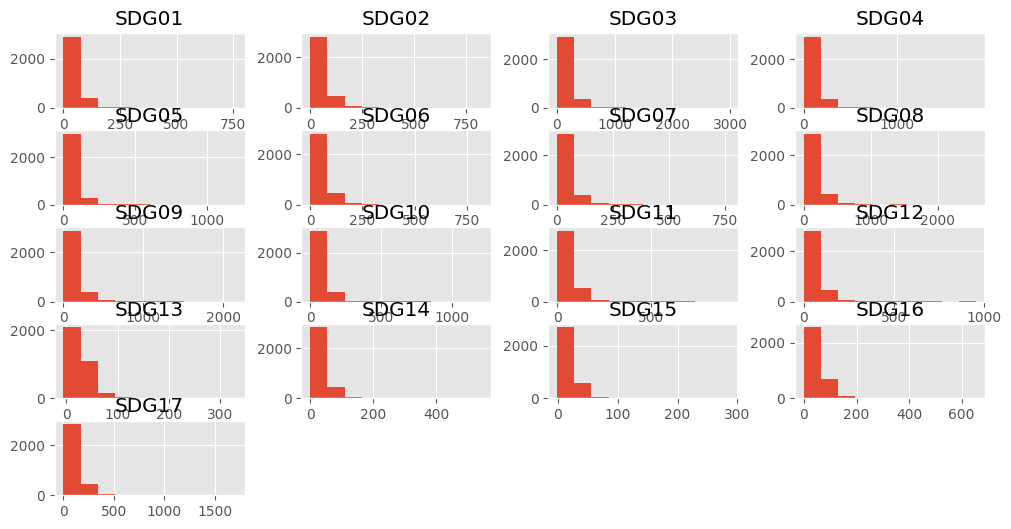

In [420]:
# Visual Python: Data Analysis > Data Info
calculated_carrefour_report.hist()
plt.show()

<Axes: >

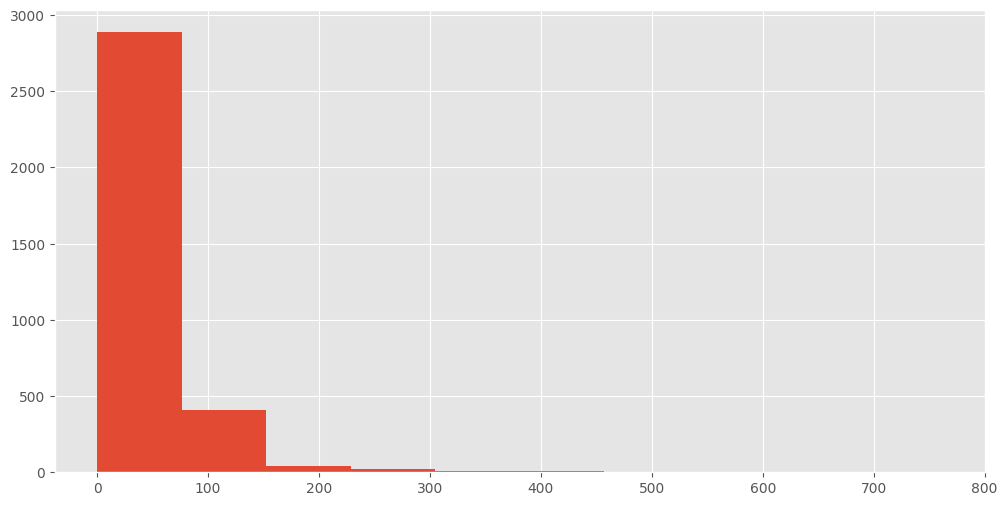

In [421]:
calculated_carrefour_report['SDG01'].hist()

In [422]:
import numpy as np

scaled_carrefour_report = np.log1p(calculated_carrefour_report)  # log(1 + value)를 적용하여 0 값 문제 해결

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [423]:
scaled_carrefour_report.describe()

,SDG01,SDG02,SDG03,SDG04,SDG05,SDG06,SDG07,SDG08,SDG09,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
count,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3380.000000,3381.000000,3360.000000,3381.000000,3371.000000,3380.000000,3381.000000
mean,3.357934,3.426265,4.534003,4.098477,3.535855,3.354304,3.211205,4.518006,4.316004,3.777261,3.547105,3.570804,2.834518,3.066155,2.534065,3.388834,4.113557
std,1.222192,1.314126,1.536910,1.416834,1.394749,1.362111,1.362873,1.433531,1.428618,1.288523,1.320151,1.315938,1.202192,1.227817,1.149568,1.255847,1.403036
min,0.000000,-2.232571,-2.587697,0.000000,-0.429394,-1.101505,0.000000,0.000000,0.000000,0.000000,-2.875427,0.000000,-4.697563,-0.461396,-2.458368,-6.575806,0.000000
25%,2.978483,3.083745,4.307017,3.831187,3.170672,2.972841,2.750663,4.251903,4.057220,3.432290,3.171805,3.237176,2.498323,2.722743,2.180476,3.087372,3.806640
50%,3.670273,3.778150,4.973741,4.484839,3.912548,3.731614,3.572231,4.915726,4.707864,4.124603,3.896628,3.914671,3.157642,3.381439,2.807167,3.718565,4.498988
75%,4.120886,4.243665,5.435254,4.946951,4.408054,4.214415,4.116552,5.365504,5.160440,4.569758,4.384115,4.387393,3.595939,3.836036,3.247158,4.161095,4.964499
max,6.637382,6.719597,8.002195,7.521121,7.092356,6.716508,6.646798,7.852859,7.676395,7.103442,6.824052,6.865430,5.804486,6.306663,5.661915,6.486239,7.442507


### Visualization

In [424]:
mean_scaled_carrefour_report = scaled_carrefour_report.mean()

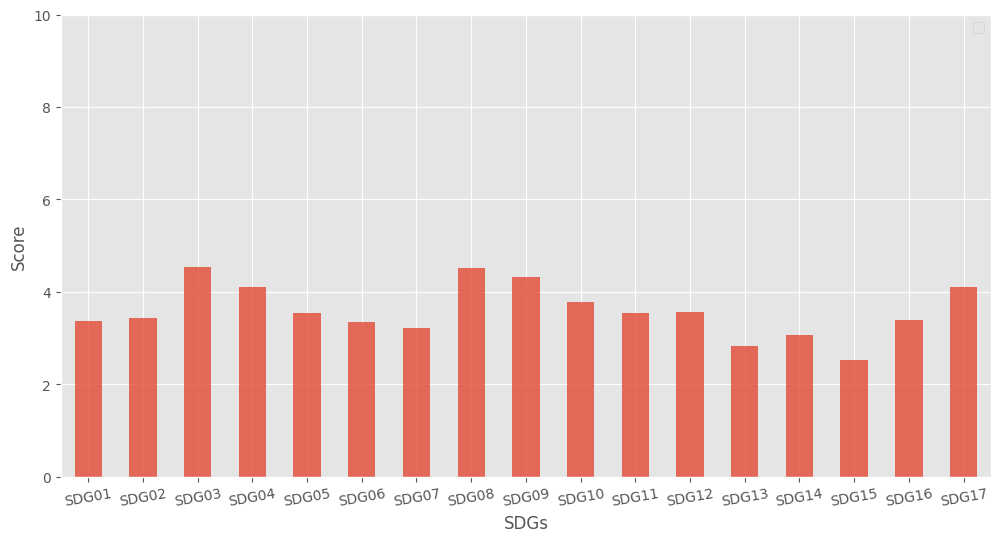

In [425]:
plt.rc('figure', figsize=(12, 6))
mean_scaled_carrefour_report.plot(kind='bar', rot=10, alpha=0.8)
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.ylim(0,10)
plt.legend(loc='best')
plt.show()

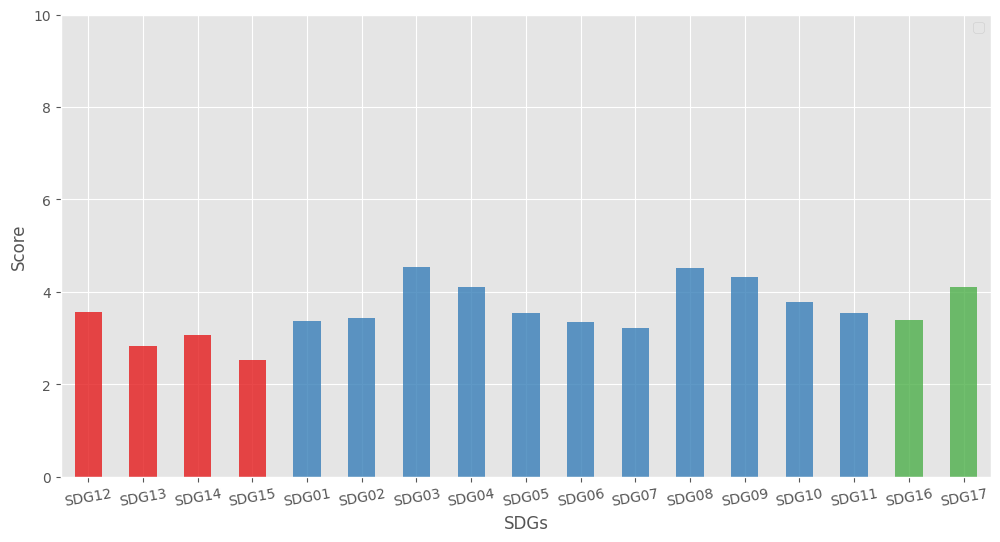

In [426]:
# SDG 번호들을 ESG에 맞게 그룹화
E_SDGs = ['SDG12', 'SDG13', 'SDG14', 'SDG15']
S_SDGs = ['SDG01', 'SDG02', 'SDG03', 'SDG04', 'SDG05', 'SDG06', 'SDG07', 'SDG08', 'SDG09', 'SDG10', 'SDG11']
G_SDGs = ['SDG16', 'SDG17']

# E, S, G 그룹에 맞게 순서 재배치
ESG_order = E_SDGs + S_SDGs + G_SDGs

# 순서 재배치된 데이터
mean_scaled_carrefour_report_reordered = mean_scaled_carrefour_report[ESG_order]

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 3)  # 파스텔 톤의 세련된 두 가지 색상

# Seaborn의 muted 컬러 팔레트를 활용한 색상 설정
e_color = colors[0]  # muted 초록 계열
s_color = colors[1]  # muted 파랑 계열
g_color = colors[2]  # muted 보라 계열

# 색상 지정: E(초록), S(파랑), G(빨강)
colors = [e_color] * len(E_SDGs) + [s_color] * len(S_SDGs) + [g_color] * len(G_SDGs)

# 그래프 그리기
plt.rc('figure', figsize=(12, 6))
mean_scaled_carrefour_report_reordered.plot(kind='bar', color=colors, rot=10, alpha=0.8)
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.ylim(0, 10)
plt.legend(loc='best')
plt.show()

In [427]:
print('E_SDGs mean: ', mean_scaled_carrefour_report[E_SDGs].mean())
print('S_SDGs mean: ', mean_scaled_carrefour_report[S_SDGs].mean())
print('G_SDGs mean: ', mean_scaled_carrefour_report[G_SDGs].mean())

E_SDGs mean:  3.001385335532608
S_SDGs mean:  3.7887652976132924
G_SDGs mean:  3.7511955737479292


## Comment

### Log scaling

In [428]:
max_carrefour = calculated_carrefour_comments.max().max()
min_carrefour = calculated_carrefour_comments.min().min()
print("max_carrefour: ", max_carrefour)
print("min_carrefour: ", min_carrefour)

max_carrefour:  2260.8255157887947
min_carrefour:  -5.943921446800232


In [429]:
calculated_carrefour_comments.mean()

,0
SDG01,19.609879
SDG02,24.145968
SDG03,89.745844
SDG04,52.230930
SDG05,27.881336
SDG06,26.566173
SDG07,17.924254
SDG08,85.710255
SDG09,66.043007
SDG10,35.847685


In [430]:
# Visual Python: Data Analysis > Data Info
calculated_carrefour_comments.describe()

,SDG01,SDG02,SDG03,SDG04,SDG05,SDG06,SDG07,SDG08,SDG09,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
count,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000
mean,19.609879,24.145968,89.745844,52.230930,27.881336,26.566173,17.924254,85.710255,66.043007,35.847685,23.723567,27.065678,15.222224,17.741318,9.771717,28.536081,44.120187
std,34.144893,42.920456,162.749576,90.575468,51.062043,47.209215,32.314989,146.065151,118.225523,60.945429,41.964222,47.305778,24.816397,32.690690,18.130079,47.605256,80.743750
min,-1.564715,-3.941953,-1.648475,-0.391257,-3.135608,-0.500356,-0.507574,-1.810679,0.000000,-0.499872,-1.472708,-0.944919,-1.624650,-0.600645,-1.865303,-5.943921,0.000000
25%,0.414234,0.021219,0.591906,0.555473,0.360966,0.329768,0.000000,3.285943,0.847823,1.164859,0.000000,0.504782,0.000000,0.000000,0.000000,1.162185,0.000000
50%,7.110469,8.444123,26.996005,18.956749,7.981298,8.832961,5.393373,32.104786,21.443780,13.689247,8.080076,9.676529,6.753882,5.159371,2.834932,11.625249,13.149442
75%,22.807775,27.943783,101.627098,60.024853,31.595581,30.483852,20.942348,99.149647,75.010940,41.766577,27.776665,30.902021,18.679486,19.822828,11.121106,32.879338,50.089945
max,483.823803,613.917250,2260.825516,1257.202185,744.920600,640.261427,496.749135,2005.729550,1673.668421,865.217480,640.214506,675.734099,365.257899,482.019602,260.381269,635.699507,1128.115346


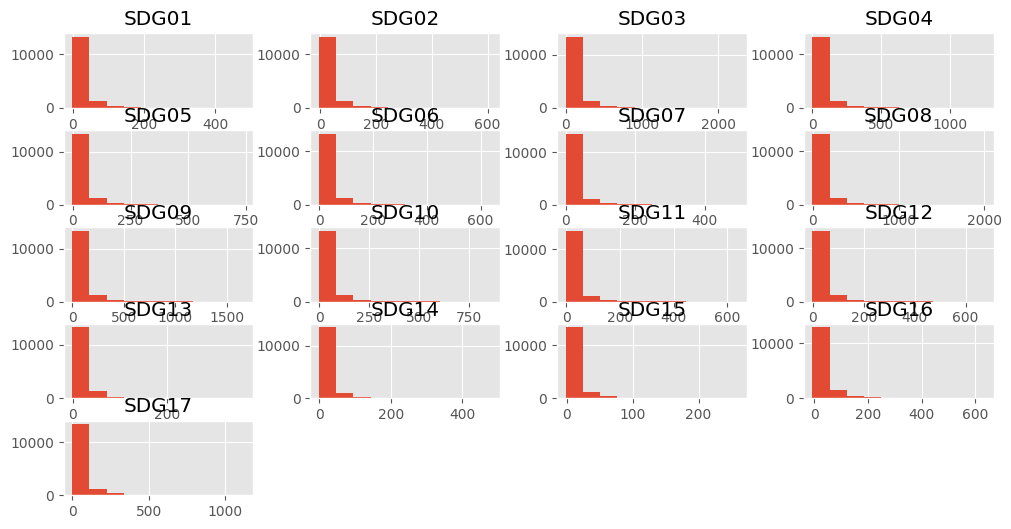

In [431]:
# Visual Python: Data Analysis > Data Info
calculated_carrefour_comments.hist()
plt.show()

<Axes: >

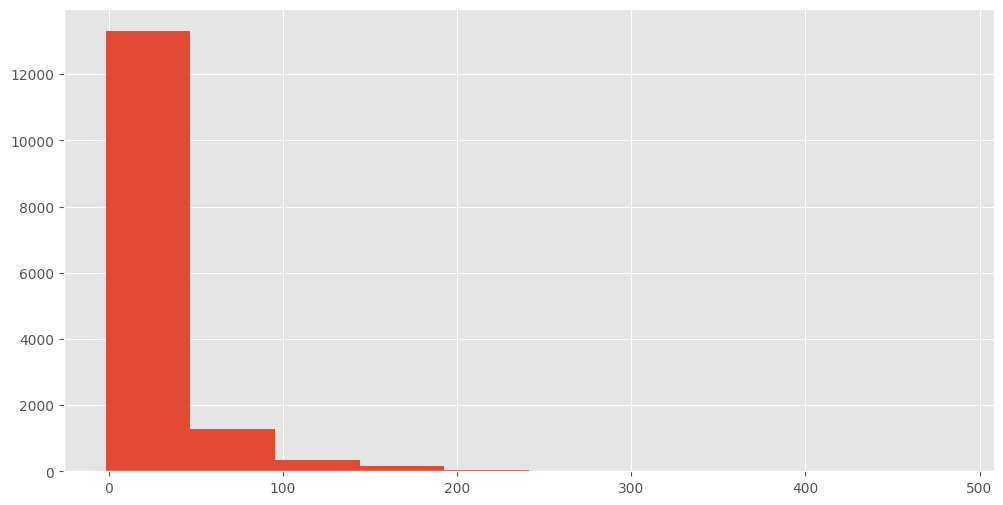

In [432]:
calculated_carrefour_comments['SDG01'].hist()

In [433]:
import numpy as np

scaled_carrefour_comments = np.log1p(calculated_carrefour_comments)  # log(1 + value)를 적용하여 0 값 문제 해결

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [434]:
scaled_carrefour_comments.describe()

,SDG01,SDG02,SDG03,SDG04,SDG05,SDG06,SDG07,SDG08,SDG09,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
count,15160.000000,15071.000000,15165.000000,15166.000000,15147.000000,15166.000000,15166.000000,15165.000000,15166.000000,15166.000000,15157.000000,15166.000000,15147.000000,15166.000000,15066.000000,15161.000000,15166.000000
mean,1.982743,2.079792,2.912646,2.630688,2.117158,2.129785,1.844479,3.101171,2.754152,2.441100,2.035822,2.187137,1.847702,1.801297,1.419900,2.303154,2.413438
std,1.524752,1.650120,2.119328,1.889985,1.690684,1.655294,1.536177,1.964974,1.972154,1.701843,1.647142,1.638412,1.463360,1.554480,1.391532,1.620472,1.866170
min,-1.554597,-4.500076,-1.181303,-0.496359,-2.312759,-0.693860,-0.708412,-0.973802,0.000000,-0.692890,-3.386209,-2.898950,-2.614095,-0.917904,-3.557757,-1.866094,0.000000
25%,0.347952,0.102008,0.465169,0.441779,0.308195,0.285005,0.000000,1.456648,0.614008,0.772355,0.000000,0.408648,0.000000,0.000000,0.000000,0.771119,0.000000
50%,2.093997,2.261551,3.332494,2.993567,2.199001,2.285740,1.855262,3.499825,3.111013,2.687116,2.208243,2.368048,2.049540,1.817975,1.357125,2.536392,2.649675
75%,3.170406,3.370377,4.631173,4.111281,3.484785,3.449475,3.088418,4.606806,4.330877,3.755757,3.360297,3.462669,2.981498,3.036050,2.505894,3.522805,3.933588
max,6.183786,6.421488,7.723928,7.137439,6.614619,6.463437,6.210096,7.604262,7.423370,6.764136,6.463364,6.517278,5.903338,6.180057,5.565980,6.456298,7.029190


### Visualization

In [435]:
mean_scaled_carrefour_comments = scaled_carrefour_comments.mean()

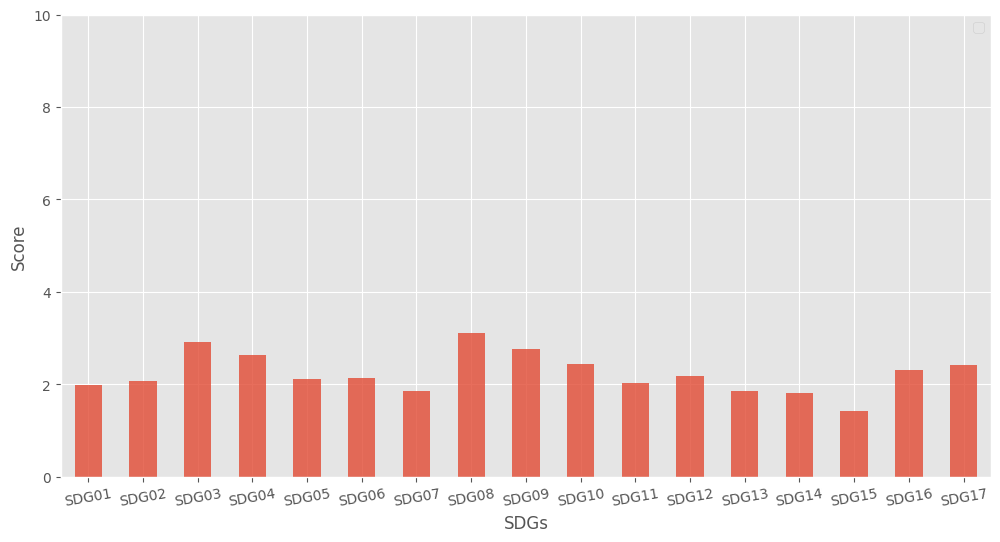

In [436]:
plt.rc('figure', figsize=(12, 6))
mean_scaled_carrefour_comments.plot(kind='bar', rot=10, alpha=0.8)
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.ylim(0,10)
plt.legend(loc='best')
plt.show()

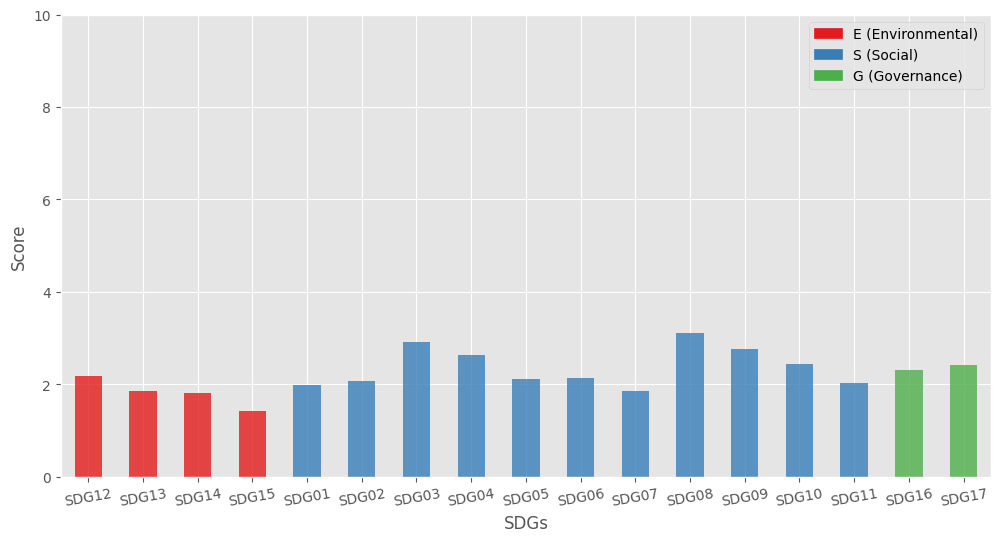

In [437]:
import seaborn as sns
import matplotlib.patches as mpatches

# SDG 번호들을 ESG에 맞게 그룹화
E_SDGs = ['SDG12', 'SDG13', 'SDG14', 'SDG15']
S_SDGs = ['SDG01', 'SDG02', 'SDG03', 'SDG04', 'SDG05', 'SDG06', 'SDG07', 'SDG08', 'SDG09', 'SDG10', 'SDG11']
G_SDGs = ['SDG16', 'SDG17']

# E, S, G 그룹에 맞게 순서 재배치
ESG_order = E_SDGs + S_SDGs + G_SDGs

# # Seaborn의 muted 컬러 팔레트를 활용한 색상 설정
# e_color = sns.color_palette("muted")[2]  # muted 초록 계열
# s_color = sns.color_palette("muted")[0]  # muted 파랑 계열
# g_color = sns.color_palette("muted")[4]  # muted 보라 계열

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 3)  # 파스텔 톤의 세련된 두 가지 색상

# Seaborn의 muted 컬러 팔레트를 활용한 색상 설정
e_color = colors[0]  # muted 초록 계열
s_color = colors[1]  # muted 파랑 계열
g_color = colors[2]  # muted 보라 계열

# 순서 재배치된 데이터
mean_scaled_carrefour_comments_reordered = mean_scaled_carrefour_comments[ESG_order]

# 색상 지정: E(초록), S(파랑), G(빨강)
colors = [e_color] * len(E_SDGs) + [s_color] * len(S_SDGs) + [g_color] * len(G_SDGs)

# 그래프 그리기
plt.rc('figure', figsize=(12, 6))
mean_scaled_carrefour_comments_reordered.plot(kind='bar', color=colors, rot=10, alpha=0.8)
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.ylim(0, 10)

# E, S, G에 대한 legend 생성
e_patch = mpatches.Patch(color=e_color, label='E (Environmental)')
s_patch = mpatches.Patch(color=s_color, label='S (Social)')
g_patch = mpatches.Patch(color=g_color, label='G (Governance)')

# 범례 추가
plt.legend(handles=[e_patch, s_patch, g_patch], loc='best')

plt.show()

In [438]:
print('E_SDGs mean: ', mean_scaled_carrefour_comments[E_SDGs].mean())
print('S_SDGs mean: ', mean_scaled_carrefour_comments[S_SDGs].mean())
print('G_SDGs mean: ', mean_scaled_carrefour_comments[G_SDGs].mean())

E_SDGs mean:  1.8140088092939815
S_SDGs mean:  2.366321504268524
G_SDGs mean:  2.358296392733049


## Comparison

### Original

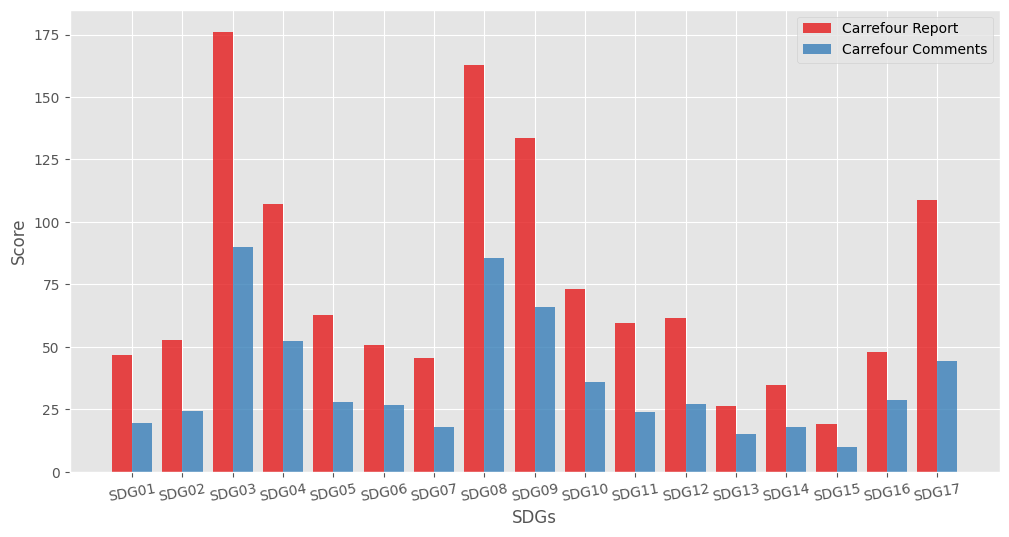

In [439]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 2)  # 파스텔 톤의 세련된 두 가지 색상

# 그래프 크기 설정
plt.rc('figure', figsize=(12, 6))

# bar의 폭을 조절하여 나란히 배치하기 위해 offset 설정
bar_width = 0.4
index = range(len(calculated_carrefour_report.columns))  # x축의 위치

# 첫 번째 데이터 (calculated_carrefour_report) 그래프
plt.bar([i - bar_width/2 for i in index], calculated_carrefour_report.mean(),
        width=bar_width, label='Carrefour Report', alpha=0.8, color=colors[0])

# 두 번째 데이터 (calculated_carrefour_comments) 그래프
plt.bar([i + bar_width/2 for i in index], calculated_carrefour_comments.mean(),
        width=bar_width, label='Carrefour Comments', alpha=0.8, color=colors[1])

# x축에 열 이름(SDG들) 설정
plt.xticks(index, calculated_carrefour_report.columns, rotation=10)

# 그래프 제목과 라벨 설정
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.legend(loc='best')

# 그래프 출력
plt.show()

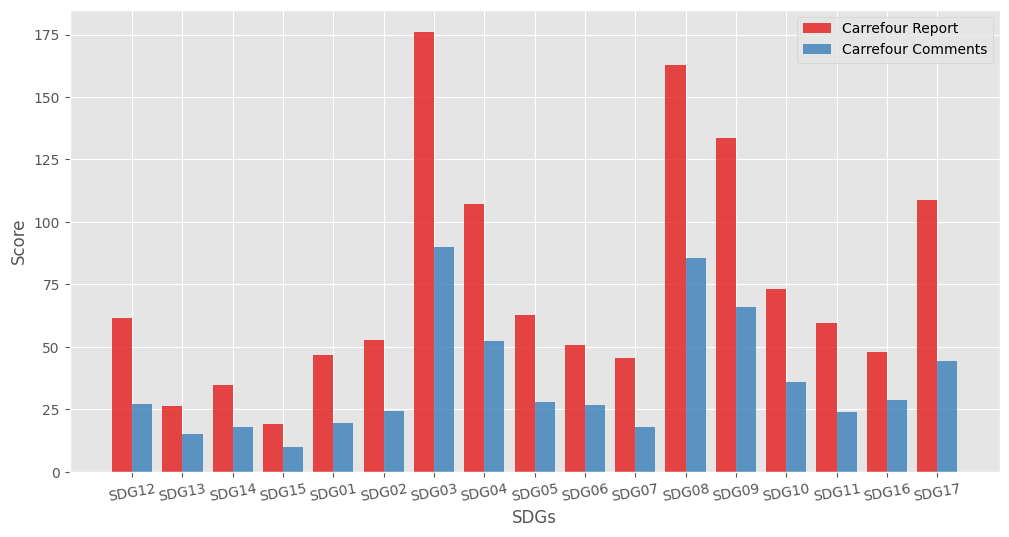

In [440]:
import matplotlib.pyplot as plt
import seaborn as sns

# SDG 번호들을 ESG에 맞게 그룹화
E_SDGs = ['SDG12', 'SDG13', 'SDG14', 'SDG15']
S_SDGs = ['SDG01', 'SDG02', 'SDG03', 'SDG04', 'SDG05', 'SDG06', 'SDG07', 'SDG08', 'SDG09', 'SDG10', 'SDG11']
G_SDGs = ['SDG16', 'SDG17']

# E, S, G 그룹에 맞게 순서 재배치
ESG_order = E_SDGs + S_SDGs + G_SDGs

# 순서 재배치된 데이터
calculated_carrefour_report_reordered = calculated_carrefour_report[ESG_order]
calculated_carrefour_comments_reordered = calculated_carrefour_comments[ESG_order]

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 2)  # 파스텔 톤의 세련된 두 가지 색상

# 그래프 크기 설정
plt.rc('figure', figsize=(12, 6))

# bar의 폭을 조절하여 나란히 배치하기 위해 offset 설정
bar_width = 0.4
index = range(len(ESG_order))  # x축의 위치

# 첫 번째 데이터 (calculated_carrefour_report) 그래프
plt.bar([i - bar_width/2 for i in index], calculated_carrefour_report_reordered.mean(),
        width=bar_width, label='Carrefour Report', alpha=0.8, color=colors[0])

# 두 번째 데이터 (calculated_carrefour_comments) 그래프
plt.bar([i + bar_width/2 for i in index], calculated_carrefour_comments_reordered.mean(),
        width=bar_width, label='Carrefour Comments', alpha=0.8, color=colors[1])

# x축에 열 이름(SDG들) 설정
plt.xticks(index, ESG_order, rotation=10)

# 그래프 제목과 라벨 설정
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.legend(loc='best')

# 그래프 출력
plt.show()

### Scaled

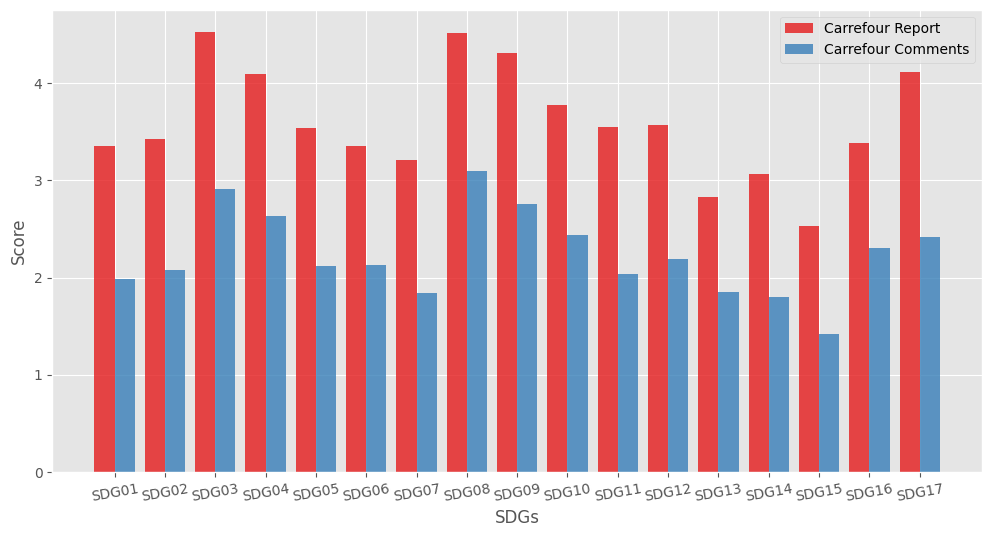

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 2)  # 파스텔 톤의 세련된 두 가지 색상

# 그래프 크기 설정
plt.rc('figure', figsize=(12, 6))

# bar의 폭을 조절하여 나란히 배치하기 위해 offset 설정
bar_width = 0.4
index = range(len(scaled_carrefour_report.columns))  # x축의 위치

# 첫 번째 데이터 (calculated_carrefour_report) 그래프
plt.bar([i - bar_width/2 for i in index], scaled_carrefour_report.mean(),
        width=bar_width, label='Carrefour Report', alpha=0.8, color=colors[0])

# 두 번째 데이터 (calculated_carrefour_comments) 그래프
plt.bar([i + bar_width/2 for i in index], scaled_carrefour_comments.mean(),
        width=bar_width, label='Carrefour Comments', alpha=0.8, color=colors[1])

# x축에 열 이름(SDG들) 설정
plt.xticks(index, scaled_carrefour_report.columns, rotation=10)

# 그래프 제목과 라벨 설정
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.legend(loc='best')

# 그래프 출력
plt.show()

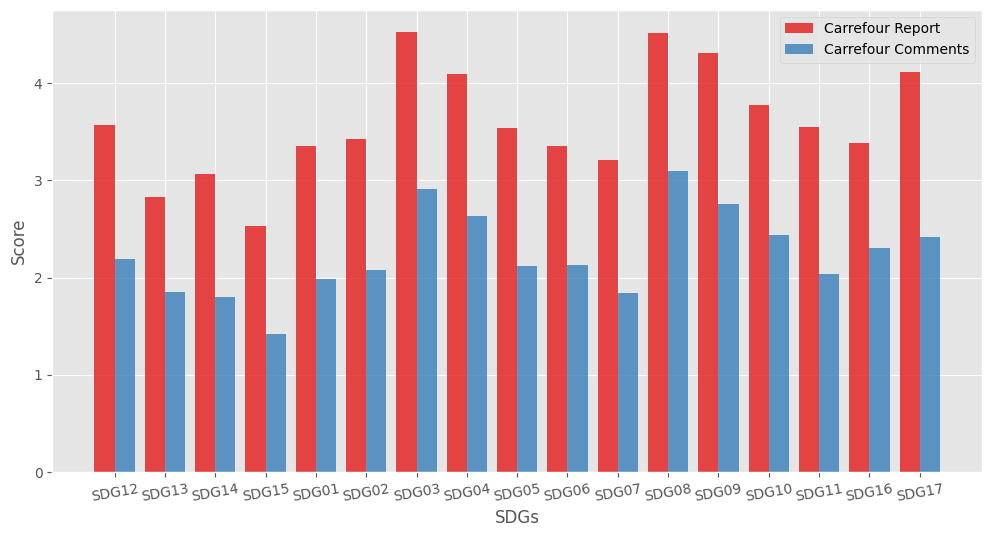

In [442]:
import matplotlib.pyplot as plt
import seaborn as sns

# SDG 번호들을 ESG에 맞게 그룹화
E_SDGs = ['SDG12', 'SDG13', 'SDG14', 'SDG15']
S_SDGs = ['SDG01', 'SDG02', 'SDG03', 'SDG04', 'SDG05', 'SDG06', 'SDG07', 'SDG08', 'SDG09', 'SDG10', 'SDG11']
G_SDGs = ['SDG16', 'SDG17']

# E, S, G 그룹에 맞게 순서 재배치
ESG_order = E_SDGs + S_SDGs + G_SDGs

# 순서 재배치된 데이터
scaled_carrefour_report_reordered = scaled_carrefour_report[ESG_order]
scaled_carrefour_comments_reordered = scaled_carrefour_comments[ESG_order]

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 2)  # 파스텔 톤의 세련된 두 가지 색상

# 그래프 크기 설정
plt.rc('figure', figsize=(12, 6))

# bar의 폭을 조절하여 나란히 배치하기 위해 offset 설정
bar_width = 0.4
index = range(len(ESG_order))  # x축의 위치

# 첫 번째 데이터 (calculated_carrefour_report) 그래프
plt.bar([i - bar_width/2 for i in index], scaled_carrefour_report_reordered.mean(),
        width=bar_width, label='Carrefour Report', alpha=0.8, color=colors[0])

# 두 번째 데이터 (calculated_carrefour_comments) 그래프
plt.bar([i + bar_width/2 for i in index], scaled_carrefour_comments_reordered.mean(),
        width=bar_width, label='Carrefour Comments', alpha=0.8, color=colors[1])

# x축에 열 이름(SDG들) 설정
plt.xticks(index, ESG_order, rotation=10)

# 그래프 제목과 라벨 설정
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.legend(loc='best')

# 그래프 출력
plt.show()

### Scaled for Comparison

In [443]:
# Min-Max 스케일링을 사용하여 0-100 사이로 값들을 스케일링
scaled_carrefour_report_2 = (scaled_carrefour_report - scaled_carrefour_report.min()) / (scaled_carrefour_report.max() - scaled_carrefour_report.min()) * 10
scaled_carrefour_comments_2 = (scaled_carrefour_comments - scaled_carrefour_comments.min()) / (scaled_carrefour_comments.max() - scaled_carrefour_comments.min()) * 10

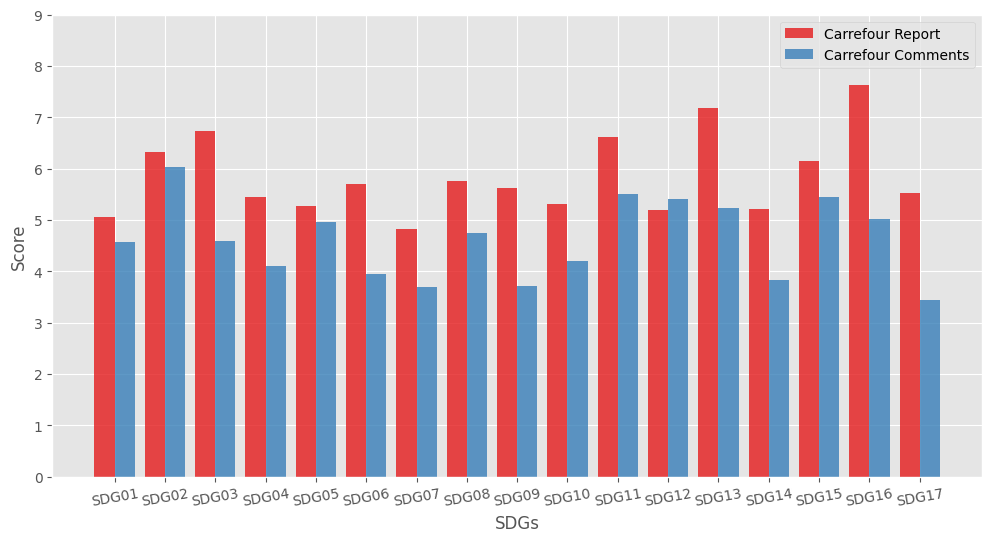

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 2)  # 파스텔 톤의 세련된 두 가지 색상

# 그래프 크기 설정
plt.rc('figure', figsize=(12, 6))

# bar의 폭을 조절하여 나란히 배치하기 위해 offset 설정
bar_width = 0.4
index = range(len(scaled_carrefour_report_2.columns))  # x축의 위치

# 첫 번째 데이터 (calculated_carrefour_report) 그래프
plt.bar([i - bar_width/2 for i in index], scaled_carrefour_report_2.mean(),
        width=bar_width, label='Carrefour Report', alpha=0.8, color=colors[0])

# 두 번째 데이터 (calculated_carrefour_comments) 그래프
plt.bar([i + bar_width/2 for i in index], scaled_carrefour_comments_2.mean(),
        width=bar_width, label='Carrefour Comments', alpha=0.8, color=colors[1])

# x축에 열 이름(SDG들) 설정
plt.xticks(index, scaled_carrefour_report_2.columns, rotation=10)

# 그래프 제목과 라벨 설정
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.ylim(0, 9)
plt.legend(loc='best')

# 그래프 출력
plt.show()

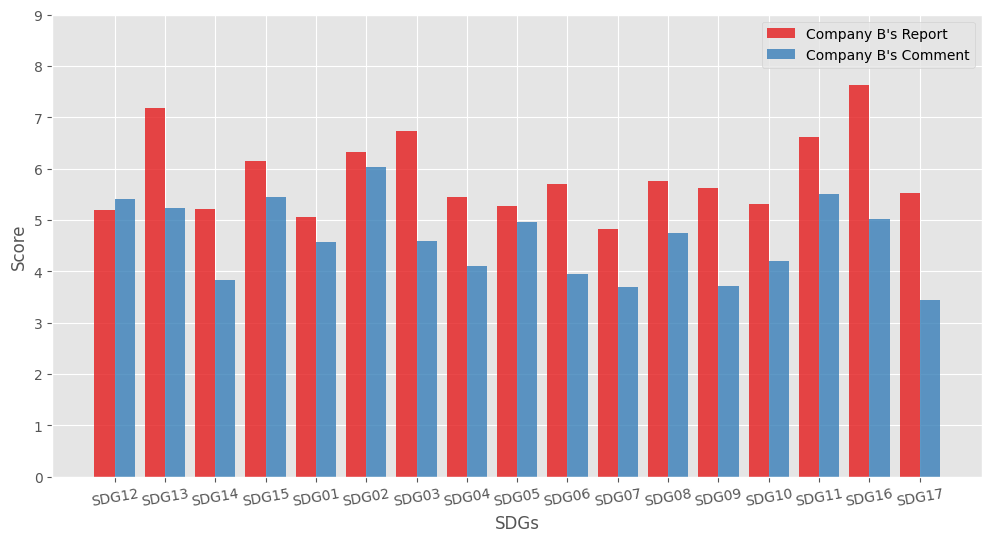

In [445]:
import matplotlib.pyplot as plt
import seaborn as sns

# SDG 번호들을 ESG에 맞게 그룹화
E_SDGs = ['SDG12', 'SDG13', 'SDG14', 'SDG15']
S_SDGs = ['SDG01', 'SDG02', 'SDG03', 'SDG04', 'SDG05', 'SDG06', 'SDG07', 'SDG08', 'SDG09', 'SDG10', 'SDG11']
G_SDGs = ['SDG16', 'SDG17']

# E, S, G 그룹에 맞게 순서 재배치
ESG_order = E_SDGs + S_SDGs + G_SDGs

# 순서 재배치된 데이터
scaled_carrefour_report_reordered_2 = scaled_carrefour_report_2[ESG_order]
scaled_carrefour_comments_reordered_2 = scaled_carrefour_comments_2[ESG_order]

# Seaborn의 모던한 색상 팔레트 설정
colors = sns.color_palette("Set1", 2)  # 파스텔 톤의 세련된 두 가지 색상

# 그래프 크기 설정
plt.rc('figure', figsize=(12, 6))

# bar의 폭을 조절하여 나란히 배치하기 위해 offset 설정
bar_width = 0.4
index = range(len(ESG_order))  # x축의 위치

# 첫 번째 데이터 (calculated_carrefour_report) 그래프
plt.bar([i - bar_width/2 for i in index], scaled_carrefour_report_reordered_2.mean(),
        width=bar_width, label="Company B's Report", alpha=0.8, color=colors[0])

# 두 번째 데이터 (calculated_carrefour_comments) 그래프
plt.bar([i + bar_width/2 for i in index], scaled_carrefour_comments_reordered_2.mean(),
        width=bar_width, label="Company B's Comment", alpha=0.8, color=colors[1])

# x축에 열 이름(SDG들) 설정
plt.xticks(index, ESG_order, rotation=10)

# 그래프 제목과 라벨 설정
plt.xlabel('SDGs')
plt.ylabel('Score')
plt.ylim(0, 9)
plt.legend(loc='best')

# 그래프 출력
plt.show()

#### Distribution Comparison

In [446]:
carrefour_report_E = scaled_carrefour_report.loc[:, ['SDG12','SDG13','SDG14','SDG15']].copy()
carrefour_report_S = scaled_carrefour_report.loc[:, ['SDG01','SDG02','SDG03','SDG04','SDG05','SDG06','SDG07','SDG08','SDG09','SDG10','SDG11']].copy()
carrefour_report_G = scaled_carrefour_report.loc[:, ['SDG16','SDG17']].copy()

carrefour_comments_E = scaled_carrefour_comments.loc[:, ['SDG12','SDG13','SDG14','SDG15']].copy()
carrefour_comments_S = scaled_carrefour_comments.loc[:, ['SDG01','SDG02','SDG03','SDG04','SDG05','SDG06','SDG07','SDG08','SDG09','SDG10','SDG11']].copy()
carrefour_comments_G = scaled_carrefour_comments.loc[:, ['SDG16','SDG17']].copy()

In [447]:
# SDG01부터 SDG17까지 반복
for i in range(1, 18):  # 1부터 17까지
    sdg_name = f'SDG{i:02}'  # SDG01, SDG02 등의 형식으로 만듦
    df_name = f'car_comments_{sdg_name}'  # 데이터프레임 이름 생성

    # 각 SDG별 데이터프레임 생성
    globals()[df_name] = pd.DataFrame()
    globals()[df_name]['score'] = scaled_carrefour_comments_2[sdg_name]
    globals()[df_name]['group'] = sdg_name
    globals()[df_name]['type'] = 'comments'



for i in range(1, 18):
  sdg_name = f'SDG{i:02}'
  df_name = f'car_reports_{sdg_name}'

  globals()[df_name] = pd.DataFrame()
  globals()[df_name]['score'] = scaled_carrefour_report_2[sdg_name]
  globals()[df_name]['group'] = sdg_name
  globals()[df_name]['type'] = 'reports'

##### E

In [448]:
car_E = pd.concat([car_comments_SDG12,car_comments_SDG13,car_comments_SDG14,car_comments_SDG15, car_reports_SDG12,car_reports_SDG13,car_reports_SDG14,car_reports_SDG15], join='outer', axis=0, ignore_index=True)



# Visual Python: ANOVA
# Two-way ANOVA
vp_df = car_E.dropna().copy()

from IPython.display import display, Markdown
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby(['type','group'])['score'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)
    _df.columns = [[x[0] for x in _df.columns],[x[1] for x in _df.columns]]

# Statistics
display(Markdown('### Statistics'))
display(pd.DataFrame(data={'Count':_df.count(),'Mean':_df.mean(numeric_only=True),'Std. Deviation':_df.std(numeric_only=True),'Min':_df.min(),'Max':_df.max(),
                   'Std. Error Mean':_df.apply(vp_sem),'Confidence interval':0.95,
                   'Lower':_df.apply(vp_confidence_interval).T[0],'Upper':_df.apply(vp_confidence_interval).T[1] }))

# Equal Variance test (Levene)
from scipy import stats
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.levene(*_lst, center='mean')
display(Markdown('### Equal Variance test (Levene)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue}, index=['Equal Variance test (Levene)']))

# Two-way ANOVA
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
_model  = smf.ols('score ~ C(group) + C(type) + C(group):C(type)', vp_df)
_result = _model.fit()
_dfr = anova_lm(_result)
_dfr.loc['Total','df'] = _dfr['df'].sum()
_dfr.loc['Total','sum_sq'] = _dfr['sum_sq'].sum()
display(Markdown('### Two-way ANOVA'))
display(_dfr)

# Post-hoc: Tukey HSD
from statsmodels.sandbox.stats.multicomp import MultiComparison
_res = MultiComparison(vp_df['score'], vp_df['group']).tukeyhsd(alpha=0.05)
display(Markdown('### Post-hoc: Tukey HSD'))
display(_res.summary())

print()
display(Markdown('### tukey detail'))
tukey = pairwise_tukeyhsd(endog=vp_df['score'], groups=vp_df['group'] + " " + vp_df['type'], alpha=0.05)
print(tukey)

### Statistics

Count      Mean  Std. Deviation  Min   Max  Std. Error Mean  \
comments SDG12  15166  5.401406        1.739988  0.0  10.0         0.014129   
         SDG13  15147  5.238429        1.718077  0.0  10.0         0.013960   
         SDG14  15166  3.830960        2.190037  0.0  10.0         0.017783   
         SDG15  15066  5.455722        1.525178  0.0  10.0         0.012426   
reports  SDG12   3381  5.201137        1.916759  0.0  10.0         0.032964   
         SDG13   3360  7.172011        1.144722  0.0  10.0         0.019748   
         SDG14   3381  5.212056        1.814135  0.0  10.0         0.031199   
         SDG15   3371  6.148103        1.415675  0.0  10.0         0.024383   

                Confidence interval     Lower     Upper  
comments SDG12                 0.95  5.373711  5.429100  
         SDG13                 0.95  5.211066  5.265792  
         SDG14                 0.95  3.796102  3.865818  
         SDG15                 0.95  5.431366  5.480078  
reports  SDG12                 0.95  5.136505  5.265769  
         SDG13                 0.95  7.133291  7.210731  
         SDG14                 0.95  5.150884  5.273228  
         SDG15                 0.95  6.100296  6.195909

### Equal Variance test (Levene)

,Statistic,p-value
Equal Variance test (Levene),866.130673,0.0


### Two-way ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
C(group),3.0,29002.039920,9667.346640,3070.281151,0.0
C(type),1.0,9971.285095,9971.285095,3166.809863,0.0
C(group):C(type),3.0,7015.012149,2338.337383,742.639471,0.0
Residual,74030.0,233097.112761,3.148684,NaN,NaN
Total,74037.0,279085.449926,NaN,NaN,NaN


### Post-hoc: Tukey HSD

group1,group2,meandiff,p-adj,lower,upper,reject
SDG12,SDG13,0.2246,0.0,0.1755,0.2736,True
SDG12,SDG14,-1.2822,0.0,-1.3312,-1.2331,True
SDG12,SDG15,0.2174,0.0,0.1683,0.2665,True
SDG13,SDG14,-1.5068,0.0,-1.5558,-1.4577,True
SDG13,SDG15,-0.0072,0.9821,-0.0563,0.042,False
SDG14,SDG15,1.4996,0.0,1.4505,1.5487,True


### tukey detail

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
SDG12 comments  SDG12 reports  -0.2003    0.0 -0.3026  -0.098   True
SDG12 comments SDG13 comments   -0.163    0.0 -0.2248 -0.1012   True
SDG12 comments  SDG13 reports   1.7706    0.0  1.6681  1.8732   True
SDG12 comments SDG14 comments  -1.5704    0.0 -1.6322 -1.5087   True
SDG12 comments  SDG14 reports  -0.1893    0.0 -0.2916 -0.0871   True
SDG12 comments SDG15 comments   0.0543 0.1347 -0.0075  0.1162  False
SDG12 comments  SDG15 reports   0.7467    0.0  0.6443  0.8491   True
 SDG12 reports SDG13 comments   0.0373  0.956  -0.065  0.1396  False
 SDG12 reports  SDG13 reports   1.9709    0.0  1.8399  2.1019   True
 SDG12 reports SDG14 comments  -1.3702    0.0 -1.4725 -1.2679   True
 SDG12 reports  SDG14 reports   0.0109    1.0 -0.1199  0.1417  False
 SDG12 reports SDG15 comments   0.

##### S

In [449]:
car_S = pd.concat([car_comments_SDG01,car_comments_SDG02,car_comments_SDG03,car_comments_SDG04, car_comments_SDG05,car_comments_SDG06,
                   car_comments_SDG07,car_comments_SDG08, car_comments_SDG09,car_comments_SDG10,car_comments_SDG11,
                   car_reports_SDG01,car_reports_SDG02,car_reports_SDG03,car_reports_SDG04,
                   car_reports_SDG05,car_reports_SDG06,car_reports_SDG07,car_reports_SDG08,
                   car_reports_SDG09,car_reports_SDG10,car_reports_SDG11], join='outer', axis=0, ignore_index=True)



# Two-way ANOVA
vp_df = car_S.dropna().copy()

from IPython.display import display, Markdown
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby(['type','group'])['score'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)
    _df.columns = [[x[0] for x in _df.columns],[x[1] for x in _df.columns]]

# Statistics
display(Markdown('### Statistics'))
display(pd.DataFrame(data={'Count':_df.count(),'Mean':_df.mean(numeric_only=True),'Std. Deviation':_df.std(numeric_only=True),'Min':_df.min(),'Max':_df.max(),
                   'Std. Error Mean':_df.apply(vp_sem),'Confidence interval':0.95,
                   'Lower':_df.apply(vp_confidence_interval).T[0],'Upper':_df.apply(vp_confidence_interval).T[1] }))

# Equal Variance test (Levene)
from scipy import stats
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.levene(*_lst, center='mean')
display(Markdown('### Equal Variance test (Levene)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue}, index=['Equal Variance test (Levene)']))

# Two-way ANOVA
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
_model  = smf.ols('score ~ C(group) + C(type) + C(group):C(type)', vp_df)
_result = _model.fit()
_dfr = anova_lm(_result)
_dfr.loc['Total','df'] = _dfr['df'].sum()
_dfr.loc['Total','sum_sq'] = _dfr['sum_sq'].sum()
display(Markdown('### Two-way ANOVA'))
display(_dfr)

# Post-hoc: Tukey HSD
from statsmodels.sandbox.stats.multicomp import MultiComparison
_res = MultiComparison(vp_df['score'], vp_df['group']).tukeyhsd(alpha=0.05)
display(Markdown('### Post-hoc: Tukey HSD'))
display(_res.summary())

print()
display(Markdown('### tukey detail'))
tukey = pairwise_tukeyhsd(endog=vp_df['score'], groups=vp_df['group'] + " " + vp_df['type'], alpha=0.05)
print(tukey)

### Statistics

Count      Mean  Std. Deviation  Min   Max  Std. Error Mean  \
comments SDG01  15160  4.571162        1.970376  0.0  10.0         0.016003   
         SDG02  15071  6.024658        1.510882  0.0  10.0         0.012307   
         SDG03  15165  4.597240        2.379869  0.0  10.0         0.019326   
         SDG04  15166  4.096319        2.475812  0.0  10.0         0.020104   
         SDG05  15147  4.962170        1.893819  0.0  10.0         0.015388   
         SDG06  15166  3.945127        2.312736  0.0  10.0         0.018780   
         SDG07  15166  3.689945        2.220388  0.0  10.0         0.018030   
         SDG08  15165  4.750458        2.290696  0.0  10.0         0.018601   
         SDG09  15166  3.710110        2.656682  0.0  10.0         0.021573   
         SDG10  15166  4.202735        2.282201  0.0  10.0         0.018532   
         SDG11  15157  5.504839        1.672298  0.0  10.0         0.013583   
reports  SDG01   3381  5.059124        1.841376  0.0  10.0         0.031668   
         SDG02   3381  6.321191        1.467941  0.0  10.0         0.025246   
         SDG03   3381  6.724997        1.451299  0.0  10.0         0.024959   
         SDG04   3381  5.449290        1.883807  0.0  10.0         0.032398   
         SDG05   3381  5.271711        1.854287  0.0  10.0         0.031890   
         SDG06   3381  5.699414        1.742273  0.0  10.0         0.029964   
         SDG07   3381  4.831206        2.050421  0.0  10.0         0.035263   
         SDG08   3381  5.753326        1.825489  0.0  10.0         0.031395   
         SDG09   3381  5.622436        1.861053  0.0  10.0         0.032006   
         SDG10   3381  5.317508        1.813942  0.0  10.0         0.031196   
         SDG11   3380  6.621522        1.361053  0.0  10.0         0.023411   

                Confidence interval     Lower     Upper  
comments SDG01                 0.95  4.539794  4.602530  
         SDG02                 0.95  6.000534  6.048781  
         SDG03                 0.95  4.559360  4.635121  
         SDG04                 0.95  4.056913  4.135725  
         SDG05                 0.95  4.932009  4.992332  
         SDG06                 0.95  3.908317  3.981938  
         SDG07                 0.95  3.654604  3.725285  
         SDG08                 0.95  4.713997  4.786919  
         SDG09                 0.95  3.667825  3.752395  
         SDG10                 0.95  4.166411  4.239060  
         SDG11                 0.95  5.478213  5.531464  
reports  SDG01                 0.95  4.997033  5.121214  
         SDG02                 0.95  6.271693  6.370689  
         SDG03                 0.95  6.676060  6.773934  
         SDG04                 0.95  5.385769  5.512811  
         SDG05                 0.95  5.209186  5.334237  
         SDG06                 0.95  5.640665  5.758162  
         SDG07                 0.95  4.762067  4.900345  
         SDG08                 0.95  5.691772  5.814881  
         SDG09                 0.95  5.559682  5.685190  
         SDG10                 0.95  5.256343  5.378673  
         SDG11                 0.95  6.575621  6.667423

### Equal Variance test (Levene)

,Statistic,p-value
Equal Variance test (Levene),981.441434,0.0


### Two-way ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
C(group),10.0,8.469756e+04,8469.755588,1908.823719,0.0
C(type),1.0,4.001024e+04,40010.243324,9017.084457,0.0
C(group):C(type),10.0,1.061499e+04,1061.499118,239.229417,0.0
Residual,203863.0,9.045727e+05,4.437160,NaN,NaN
Total,203884.0,1.039895e+06,NaN,NaN,NaN


### Post-hoc: Tukey HSD

group1,group2,meandiff,p-adj,lower,upper,reject
SDG01,SDG02,1.4188,0.0,1.3464,1.4913,True
SDG01,SDG03,0.325,0.0,0.2526,0.3973,True
SDG01,SDG04,-0.3172,0.0,-0.3895,-0.2448,True
SDG01,SDG05,0.3585,0.0,0.2861,0.4309,True
SDG01,SDG06,-0.3952,0.0,-0.4676,-0.3229,True
SDG01,SDG07,-0.7622,0.0,-0.8345,-0.6898,True
SDG01,SDG08,0.2731,0.0,0.2008,0.3455,True
SDG01,SDG09,-0.6014,0.0,-0.6738,-0.5291,True
SDG01,SDG10,-0.2542,0.0,-0.3265,-0.1818,True
SDG01,SDG11,1.0483,0.0,0.9759,1.1207,True


### tukey detail

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
SDG01 comments  SDG01 reports    0.488    0.0   0.344  0.6319   True
SDG01 comments SDG02 comments   1.4535    0.0  1.3664  1.5406   True
SDG01 comments  SDG02 reports     1.75    0.0  1.6061   1.894   True
SDG01 comments SDG03 comments   0.0261    1.0 -0.0608   0.113  False
SDG01 comments  SDG03 reports   2.1538    0.0  2.0099  2.2978   True
SDG01 comments SDG04 comments  -0.4748    0.0 -0.5618 -0.3879   True
SDG01 comments  SDG04 reports   0.8781    0.0  0.7342  1.0221   True
SDG01 comments SDG05 comments    0.391    0.0  0.3041   0.478   True
SDG01 comments  SDG05 reports   0.7005    0.0  0.5566  0.8445   True
SDG01 comments SDG06 comments   -0.626    0.0  -0.713 -0.5391   True
SDG01 comments  SDG06 reports   1.1283    0.0  0.9843  1.2722   True
SDG01 comments SDG07 comments  -0.

##### G

In [450]:
car_G = pd.concat([car_comments_SDG16,car_comments_SDG17,
                   car_reports_SDG16,car_reports_SDG17], join='outer', axis=0, ignore_index=True)



# Two-way ANOVA
vp_df = car_G.dropna().copy()

from IPython.display import display, Markdown
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby(['type','group'])['score'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)
    _df.columns = [[x[0] for x in _df.columns],[x[1] for x in _df.columns]]

# Statistics
display(Markdown('### Statistics'))
display(pd.DataFrame(data={'Count':_df.count(),'Mean':_df.mean(numeric_only=True),'Std. Deviation':_df.std(numeric_only=True),'Min':_df.min(),'Max':_df.max(),
                   'Std. Error Mean':_df.apply(vp_sem),'Confidence interval':0.95,
                   'Lower':_df.apply(vp_confidence_interval).T[0],'Upper':_df.apply(vp_confidence_interval).T[1] }))

# Equal Variance test (Levene)
from scipy import stats
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.levene(*_lst, center='mean')
display(Markdown('### Equal Variance test (Levene)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue}, index=['Equal Variance test (Levene)']))

# Two-way ANOVA
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
_model  = smf.ols('score ~ C(group) + C(type) + C(group):C(type)', vp_df)
_result = _model.fit()
_dfr = anova_lm(_result)
_dfr.loc['Total','df'] = _dfr['df'].sum()
_dfr.loc['Total','sum_sq'] = _dfr['sum_sq'].sum()
display(Markdown('### Two-way ANOVA'))
display(_dfr)

# Post-hoc: Tukey HSD
from statsmodels.sandbox.stats.multicomp import MultiComparison
_res = MultiComparison(vp_df['score'], vp_df['group']).tukeyhsd(alpha=0.05)
display(Markdown('### Post-hoc: Tukey HSD'))
display(_res.summary())

print()
display(Markdown('### tukey detail'))
tukey = pairwise_tukeyhsd(endog=vp_df['score'], groups=vp_df['group'] + " " + vp_df['type'], alpha=0.05)
print(tukey)

### Statistics

Count      Mean  Std. Deviation  Min   Max  Std. Error Mean  \
comments SDG16  15161  5.009676        1.947123  0.0  10.0         0.015814   
         SDG17  15166  3.433452        2.654887  0.0  10.0         0.021558   
reports  SDG16   3380  7.628698        0.961447  0.0  10.0         0.016537   
         SDG17   3381  5.527113        1.885166  0.0  10.0         0.032421   

                Confidence interval     Lower     Upper  
comments SDG16                 0.95  4.978679  5.040672  
         SDG17                 0.95  3.391195  3.475708  
reports  SDG16                 0.95  7.596274  7.661122  
         SDG17                 0.95  5.463546  5.590680

### Equal Variance test (Levene)

,Statistic,p-value
Equal Variance test (Levene),2394.479975,0.0


### Two-way ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
C(group),1.0,25920.877046,25920.877046,5355.128838,0.000000e+00
C(type),1.0,30695.087482,30695.087482,6341.457808,0.000000e+00
C(group):C(type),1.0,381.472654,381.472654,78.810420,7.135992e-19
Residual,37084.0,179500.780192,4.840383,NaN,NaN
Total,37087.0,236498.217374,NaN,NaN,NaN


### Post-hoc: Tukey HSD

group1,group2,meandiff,p-adj,lower,upper,reject
SDG16,SDG17,-1.672,0.0,-1.7205,-1.6235,True


### tukey detail

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------
SDG16 comments  SDG16 reports    2.619   0.0  2.5115  2.7265   True
SDG16 comments SDG17 comments  -1.5762   0.0 -1.6411 -1.5113   True
SDG16 comments  SDG17 reports   0.5174   0.0  0.4099  0.6249   True
 SDG16 reports SDG17 comments  -4.1952   0.0 -4.3028 -4.0877   True
 SDG16 reports  SDG17 reports  -2.1016   0.0 -2.2391 -1.9641   True
SDG17 comments  SDG17 reports   2.0937   0.0  1.9862  2.2012   True
-------------------------------------------------------------------
